In [1]:
import pickle
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [2]:
master_df = pickle.load( open('master_df_425_18.pkl', "rb" ) )

In [3]:
sns.set_style("darkgrid")

In [4]:
# master_df["LOG_DPY"]=np.log10(master_df["DOLLARS_PER_YEAR"])
# master_df["LOG_2_DPY"]=np.log10(master_df["LOG_DPY"])

In [5]:
# #Save progress
# with open('master_df_42418.pkl', 'wb') as picklefile:
#     pickle.dump(master_df, picklefile)

In [6]:
master_df.describe()

PA_x         BB%          K%        BB/K       AVG_x         OBP  \
count  503.000000  503.000000  503.000000  503.000000  503.000000  503.000000   
mean   377.489066    8.256262   19.968191    0.450716    0.249457    0.316638   
std    164.032560    3.028292    6.587243    0.199144    0.033478    0.035248   
min    102.000000    0.500000    5.800000    0.030000    0.142000    0.214000   
25%    237.000000    6.100000   15.250000    0.310000    0.229000    0.293000   
50%    362.000000    8.000000   19.900000    0.430000    0.249000    0.317000   
75%    506.500000   10.000000   24.200000    0.550000    0.271000    0.339000   
max    739.000000   20.100000   42.900000    1.670000    0.346000    0.423000   

              SLG         OPS         ISO         Spd     ...      \
count  503.000000  503.000000  503.000000  503.000000     ...       
mean     0.397547    0.714179    0.148087    3.416899     ...       
std      0.072344    0.098767    0.058093    1.837376     ...       
min      0.221000    0.463000    0.014000    0.300000     ...       
25%      0.346000    0.642500    0.106000    2.000000     ...       
50%      0.389000    0.708000    0.140000    3.100000     ...       
75%      0.449000    0.787000    0.187500    4.500000     ...       
max      0.690000    1.066000    0.387000    8.500000     ...       

       Replacement         RAR         WAR  Fangraphs_Dollars         AGE  \
count   503.000000  503.000000  503.000000         503.000000  503.000000   
mean     11.120676    9.670974    1.010139           7.383101   36.373757   
std       4.841834   14.810634    1.555339          11.315147    4.097355   
min       3.000000  -21.800000   -2.300000         -13.600000   25.000000   
25%       6.900000   -0.600000   -0.100000          -0.500000   33.500000   
50%      10.700000    6.000000    0.600000           4.500000   36.000000   
75%      15.000000   17.500000    1.850000          13.650000   39.000000   
max      21.900000   73.900000    7.700000          47.700000   50.000000   

              YRS       DOLLARS  DOLLARS_PER_YEAR     LOG_DPY   LOG_2_DPY  
count  503.000000  5.030000e+02      5.030000e+02  503.000000  503.000000  
mean     1.642147  1.330817e+07      4.623866e+06    6.363699    0.802199  
std      1.331197  3.065207e+07      5.478073e+06    0.531914    0.036240  
min      1.000000  4.970000e+05      4.970000e+05    5.696356    0.755597  
25%      1.000000  4.970000e+05      4.970000e+05    5.696356    0.755597  
50%      1.000000  2.750000e+06      2.250000e+06    6.352183    0.802923  
75%      2.000000  9.250000e+06      6.500000e+06    6.812913    0.833333  
max     10.000000  2.500000e+08      2.750000e+07    7.439333    0.871534  

[8 rows x 54 columns]

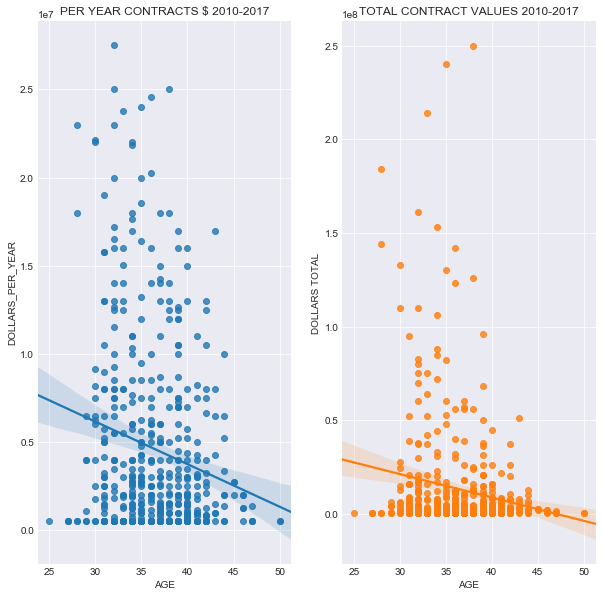

In [7]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (10, 10))

sns.regplot(x=master_df["AGE"],y=master_df["DOLLARS_PER_YEAR"],ax=ax1)

ax1.set_title("PER YEAR CONTRACTS $ 2010-2017")
ax1.set_ylabel('DOLLARS_PER_YEAR')    
ax1.set_xlabel('AGE')

sns.regplot(x=master_df["AGE"],y=master_df["DOLLARS"],ax=ax2)

ax2.set_title("TOTAL CONTRACT VALUES 2010-2017")
ax2.set_ylabel('DOLLARS TOTAL')    
ax2.set_xlabel('AGE')

plt.savefig("age_vs_contract")



In [8]:
# fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (10, 10))
pos_totals = master_df.groupby(by="POS")["DOLLARS_PER_YEAR"].mean()
pos_totals = pos_totals.reset_index().sort_values(by="DOLLARS_PER_YEAR",ascending=False)
pos_totals.head()

POS  DOLLARS_PER_YEAR
5  DH      1.208425e+07
7  RF      6.064348e+06
6  LF      4.706589e+06
0  1B      4.662296e+06
2  3B      4.408170e+06

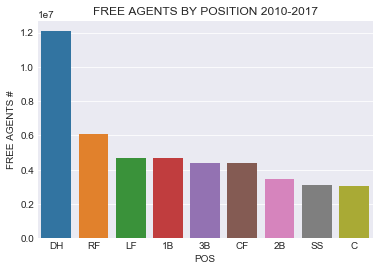

In [9]:
sns.barplot(x="POS",y="DOLLARS_PER_YEAR",data = pos_totals)
plt.ylabel("FREE AGENTS #")
plt.title("FREE AGENTS BY POSITION 2010-2017");

In [10]:
top_10 = master_df[["PLAYER_YEAR","DOLLARS","DOLLARS_PER_YEAR"]].sort_values(by="DOLLARS_PER_YEAR",ascending=False).head(10)
top_10

PLAYER_YEAR      DOLLARS  DOLLARS_PER_YEAR
PLAYER_YEAR                                                              
Yoenis Cespedes 2016  Yoenis Cespedes 2016  110000000.0      2.750000e+07
Yoenis Cespedes 2015  Yoenis Cespedes 2015   75000000.0      2.500000e+07
Albert Pujols 2011      Albert Pujols 2011  250000000.0      2.500000e+07
Josh Hamilton 2012      Josh Hamilton 2012  123000000.0      2.460000e+07
Robinson Cano 2013      Robinson Cano 2013  240000000.0      2.400000e+07
Prince Fielder 2011    Prince Fielder 2011  214000000.0      2.377778e+07
Chris Davis 2015          Chris Davis 2015  161000000.0      2.300000e+07
Jason Heyward 2015      Jason Heyward 2015  184000000.0      2.300000e+07
Justin Upton 2015        Justin Upton 2015  132750000.0      2.212500e+07
Hanley Ramirez 2014    Hanley Ramirez 2014   88000000.0      2.200000e+07

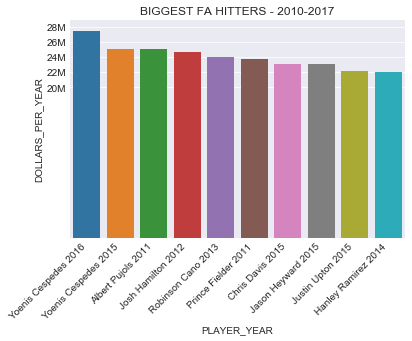

In [11]:
sns.barplot(x="PLAYER_YEAR",y="DOLLARS_PER_YEAR",data = top_10)
plt.ylabel("DOLLARS_PER_YEAR")
plt.title("BIGGEST FA HITTERS - 2010-2017")
plt.yticks(range(int(2e7),int(3e7),int(2e6)),["20M","22M","24M","26M","28M","30M"])
plt.xticks(rotation = 45, ha = 'right');

In [12]:
num_cols = list(c for c in master_df.columns \
                            if master_df[c].dtype != "object")
# num_cols

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


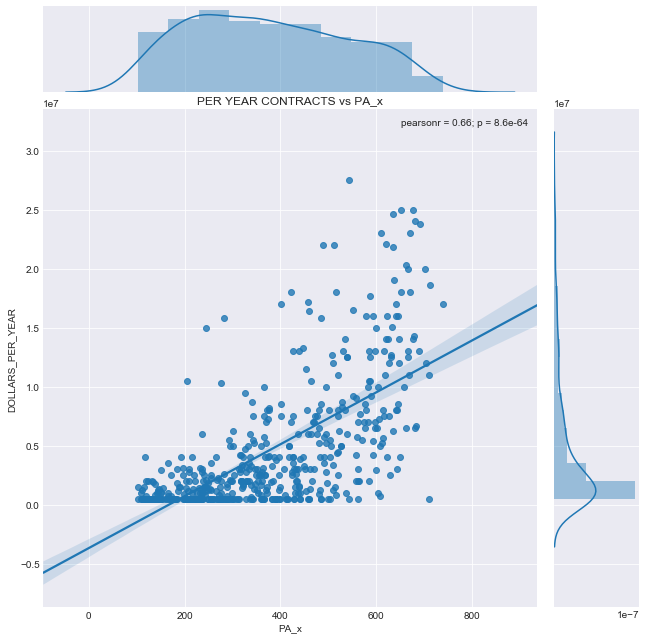

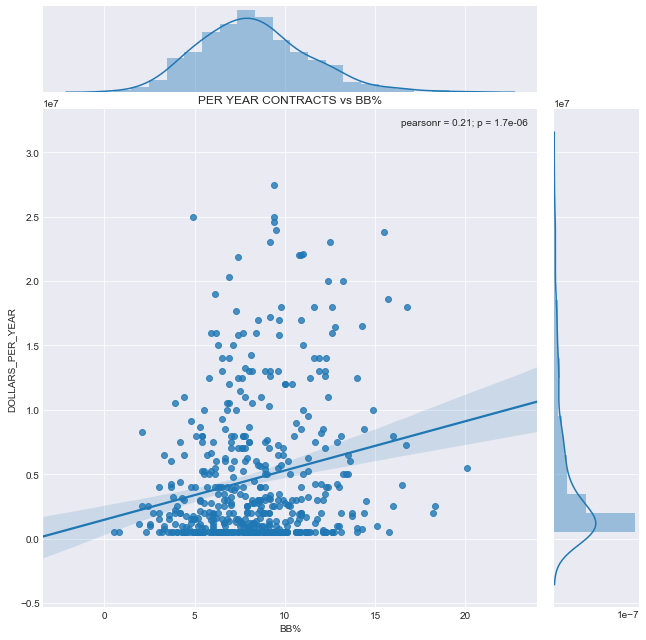

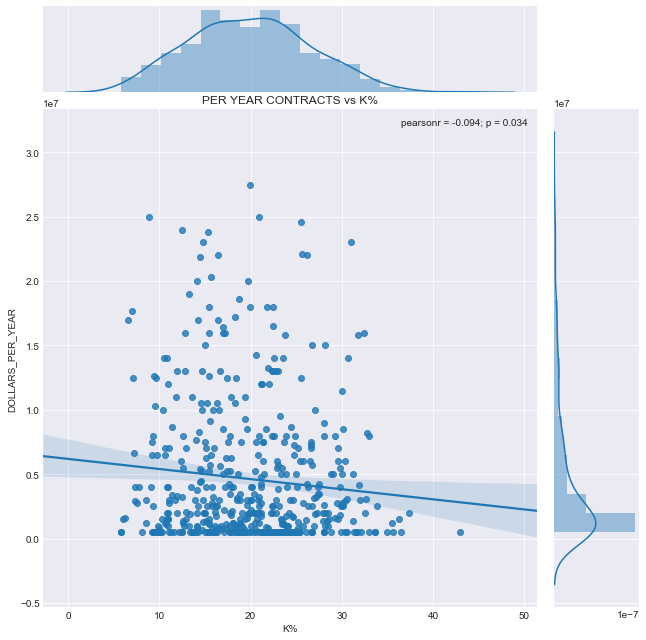

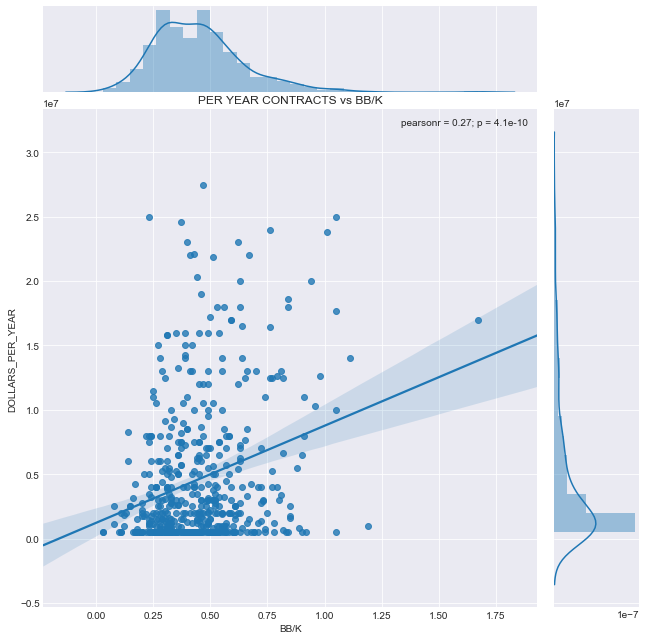

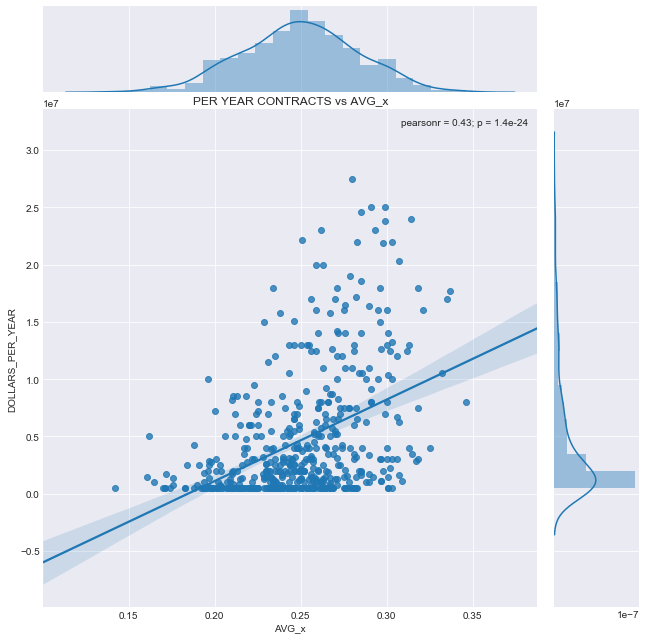

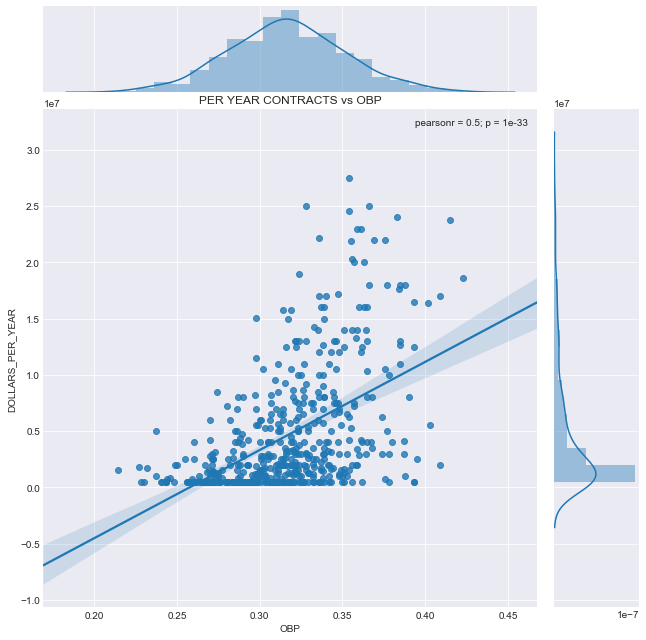

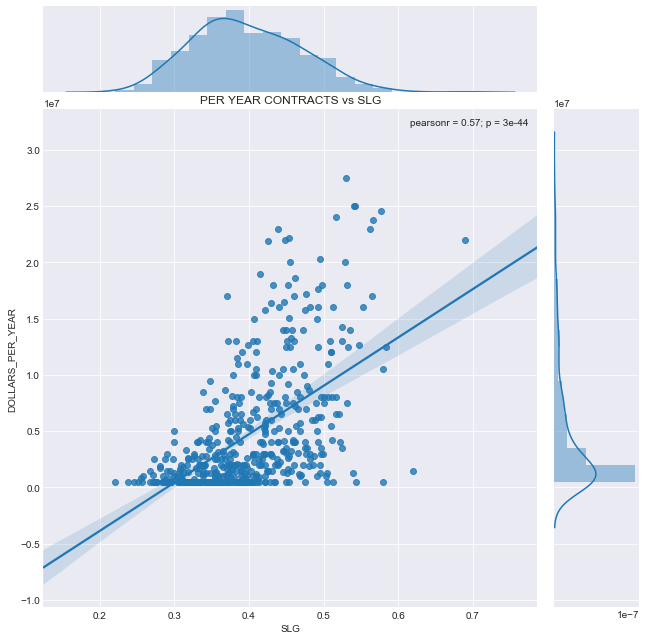

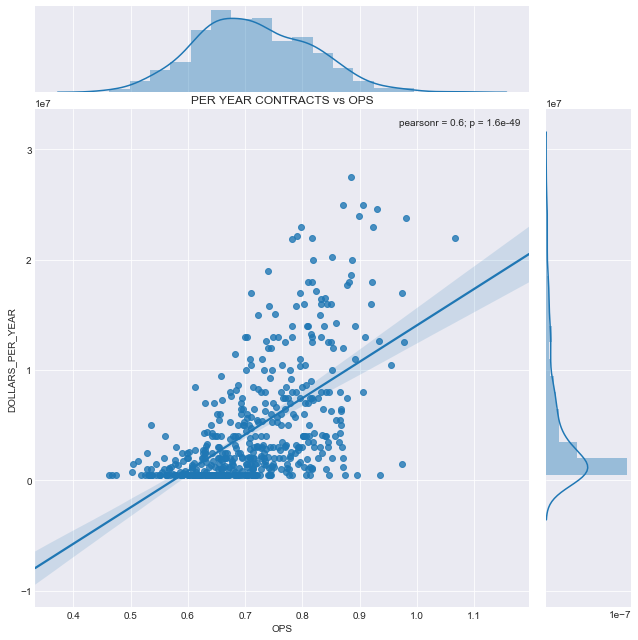

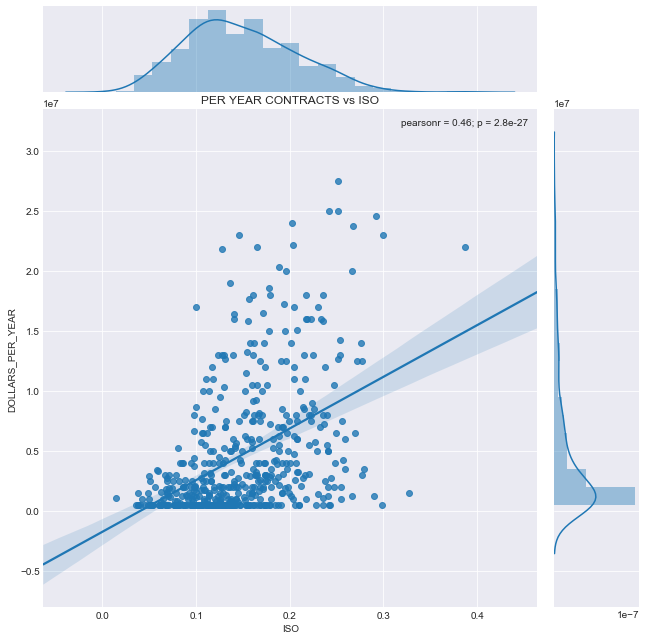

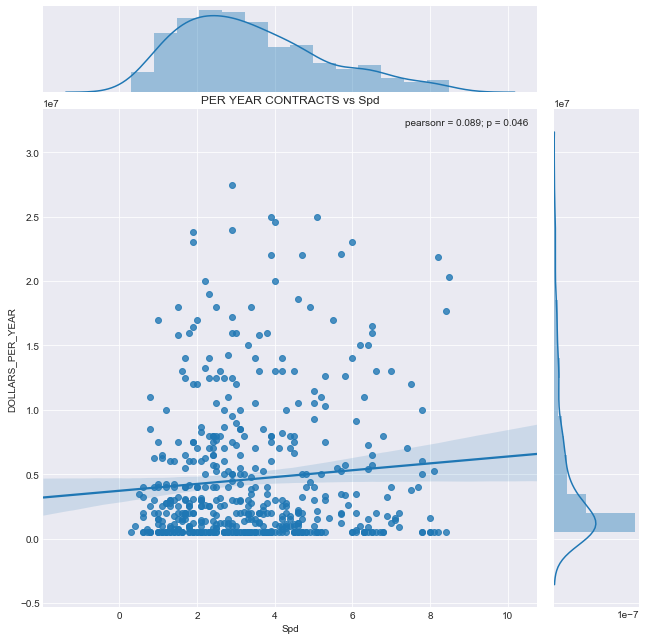

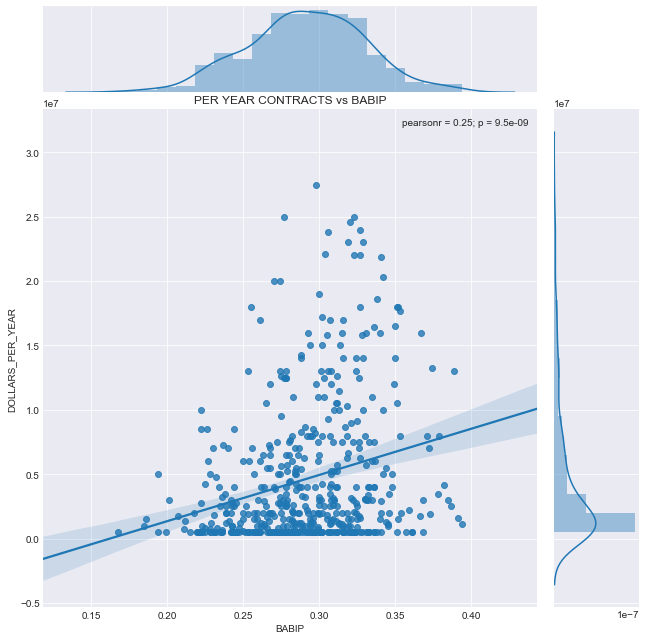

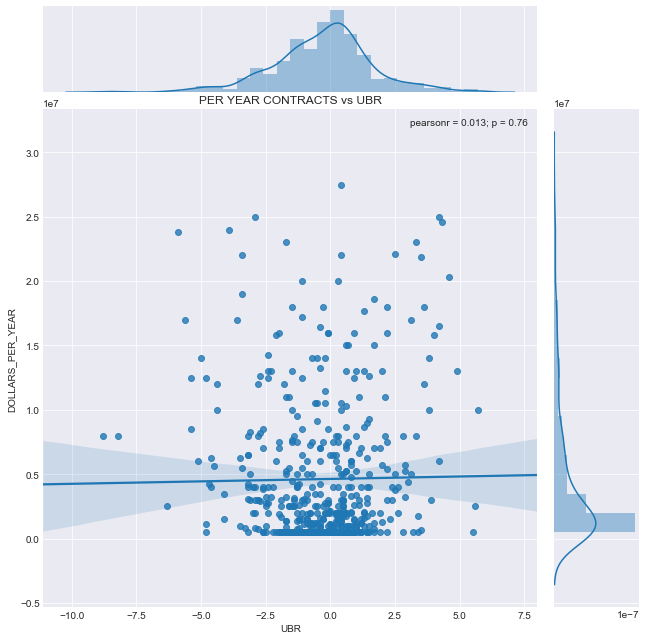

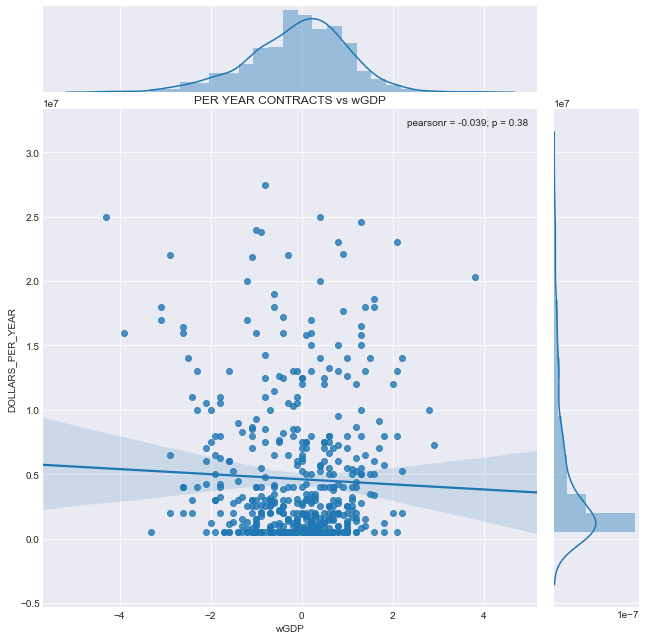

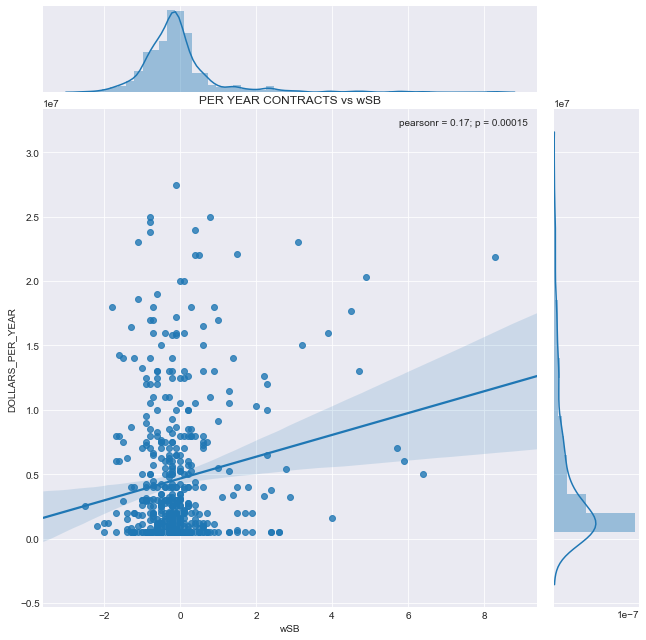

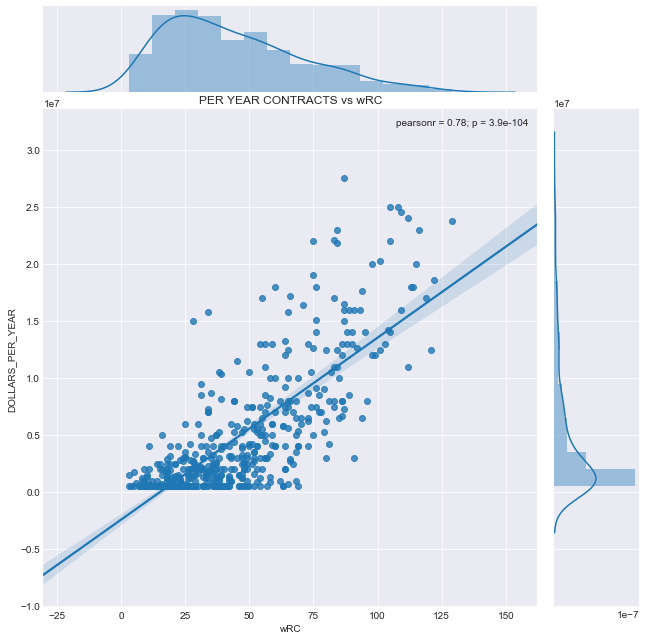

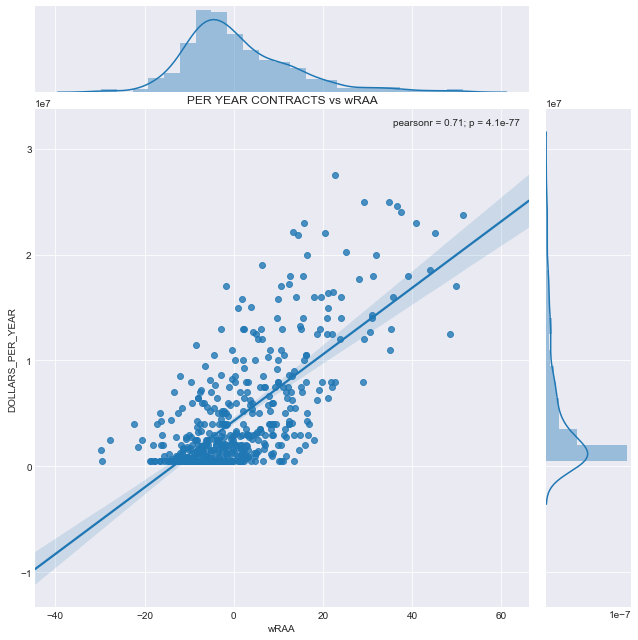

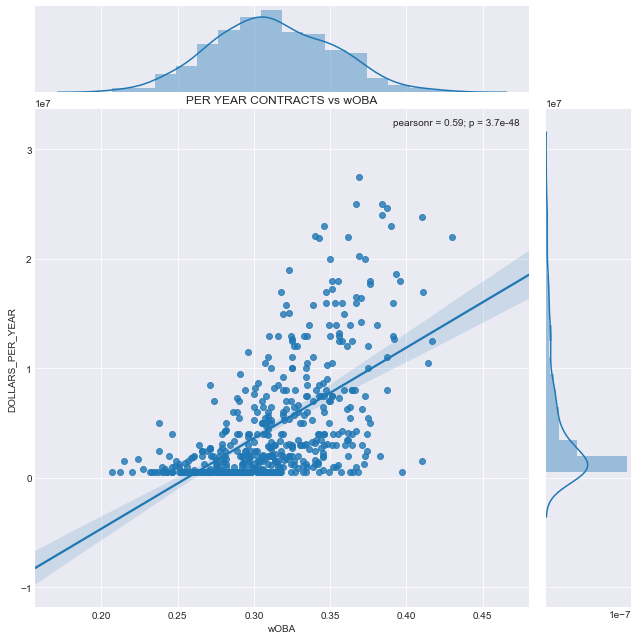

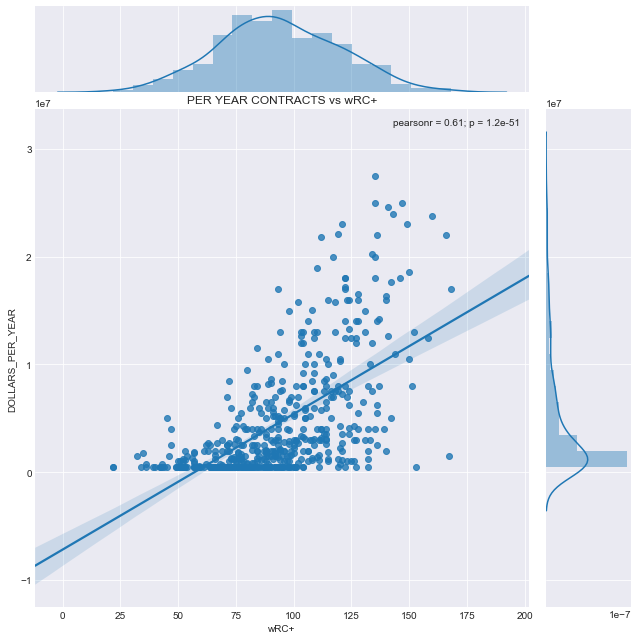

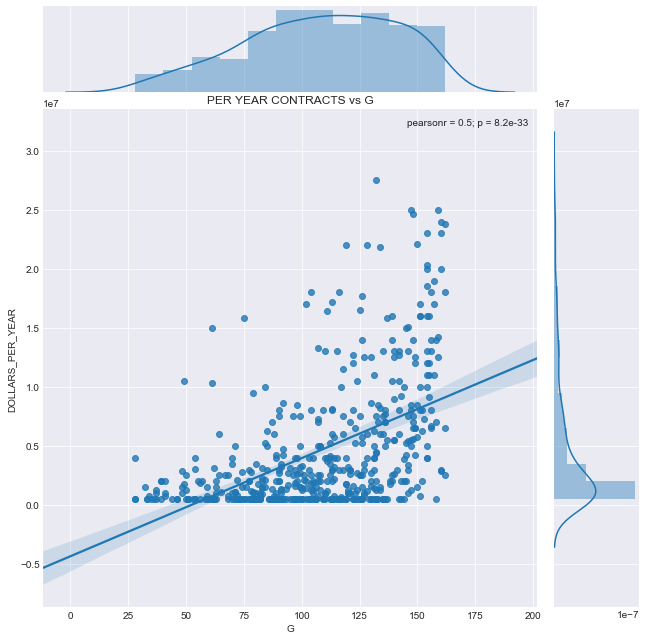

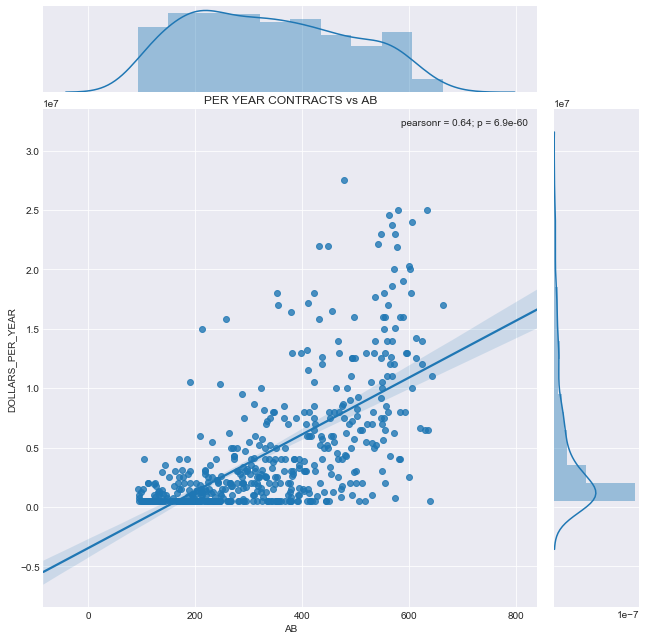

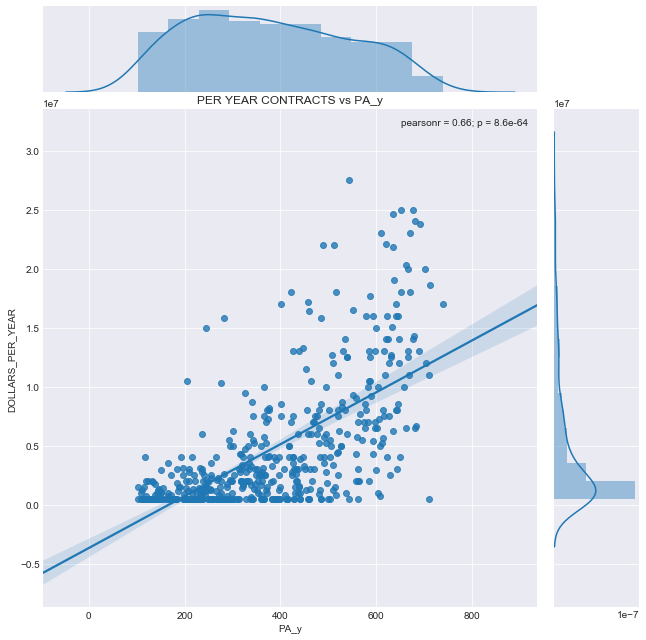

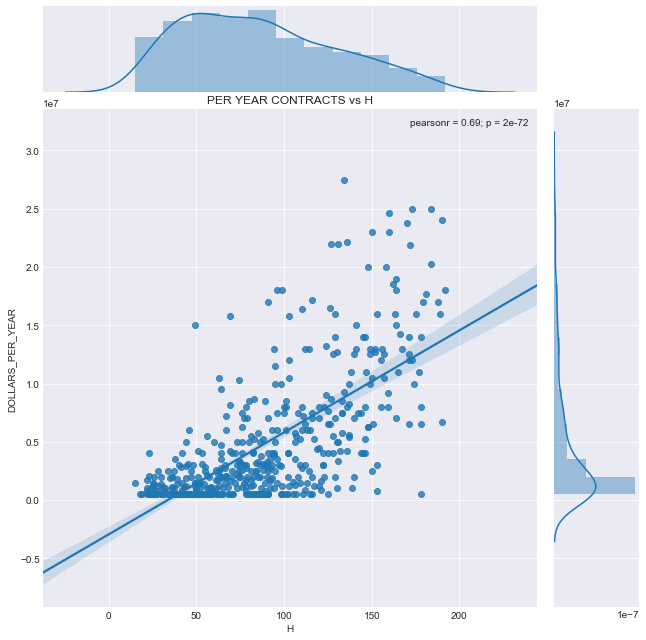

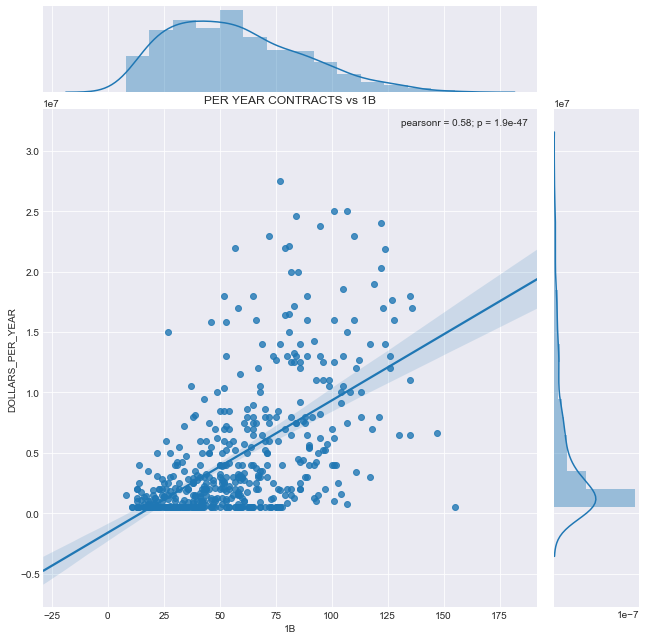

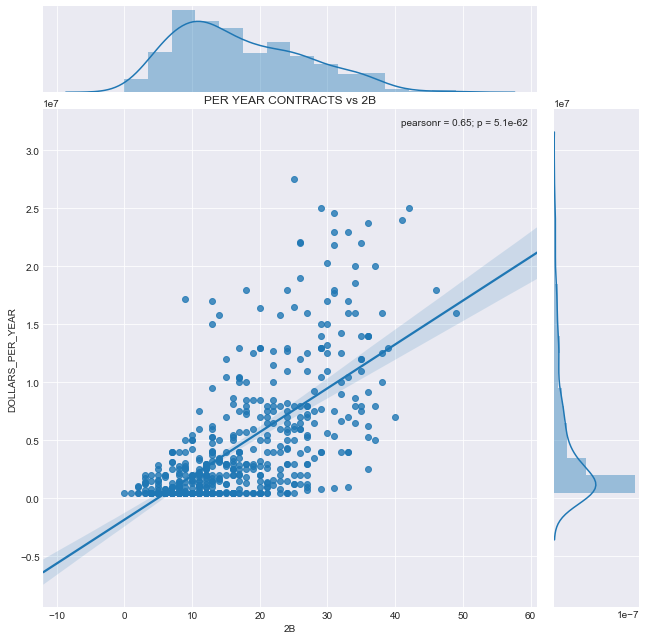

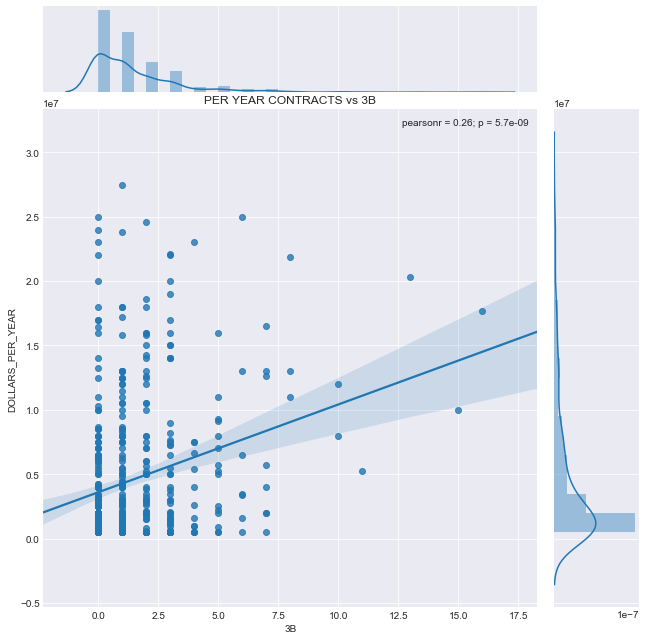

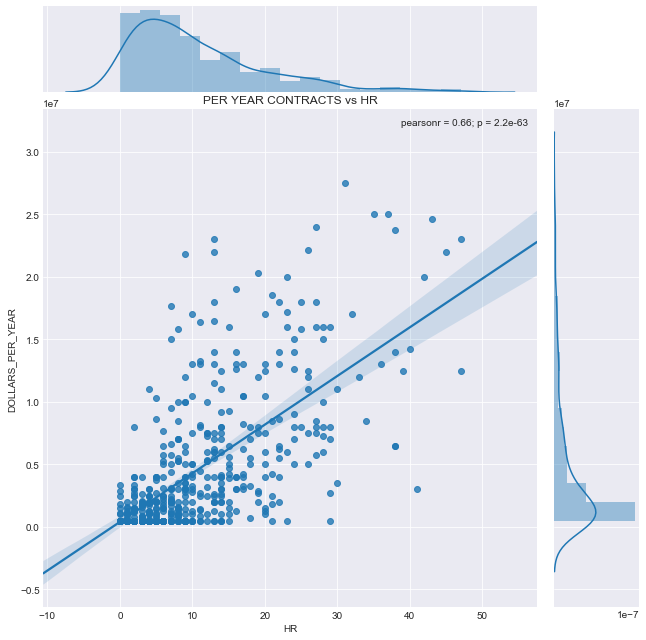

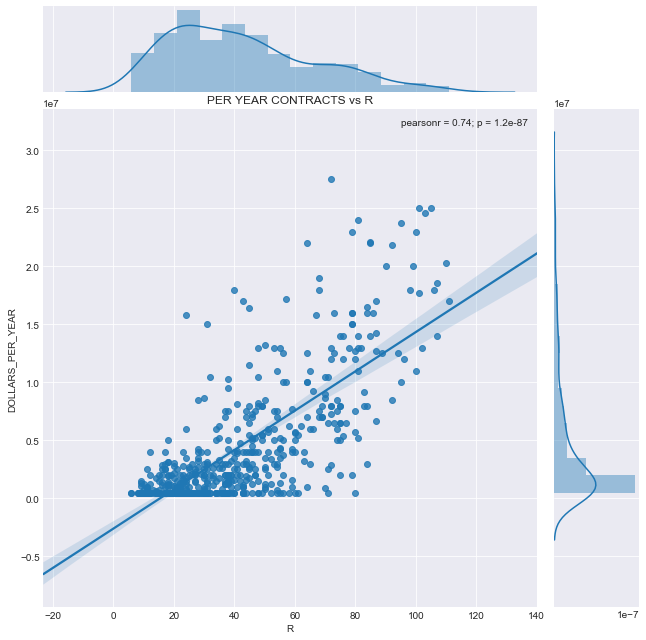

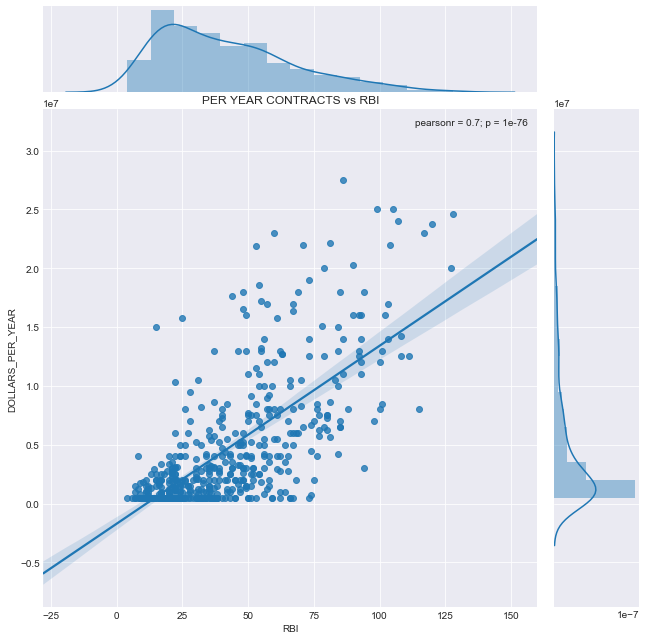

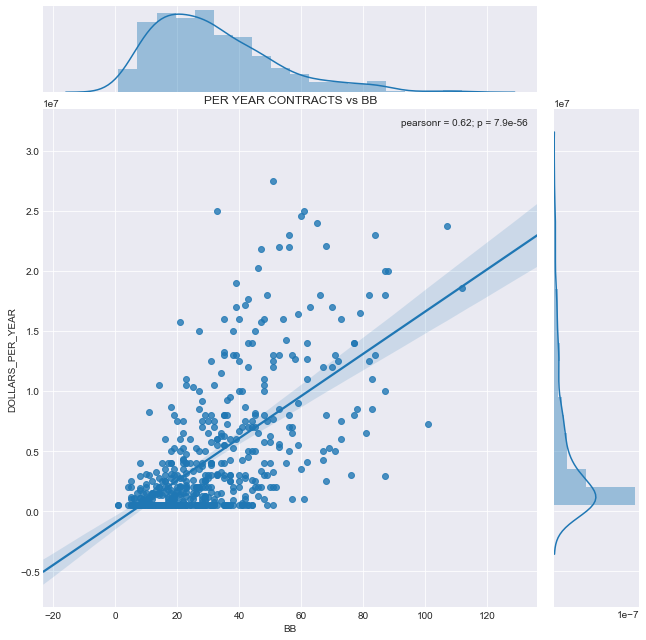

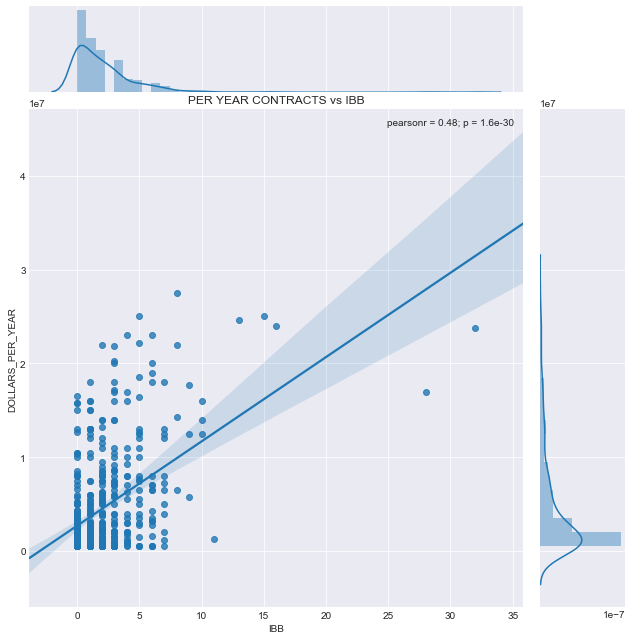

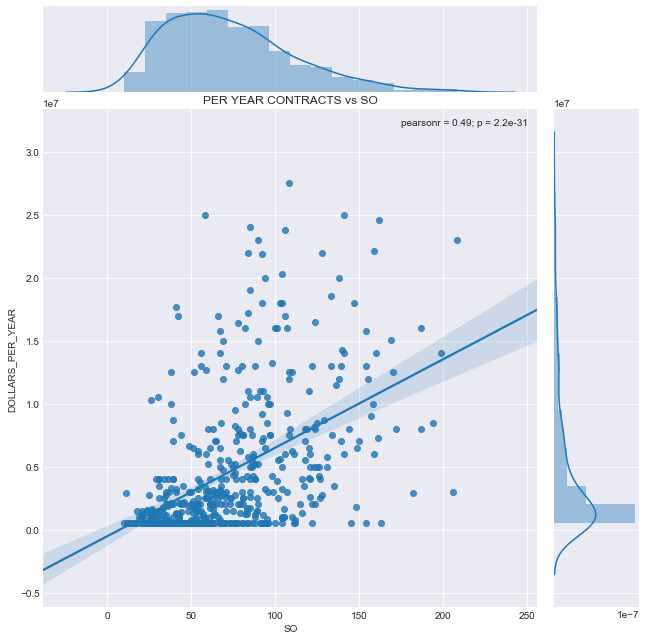

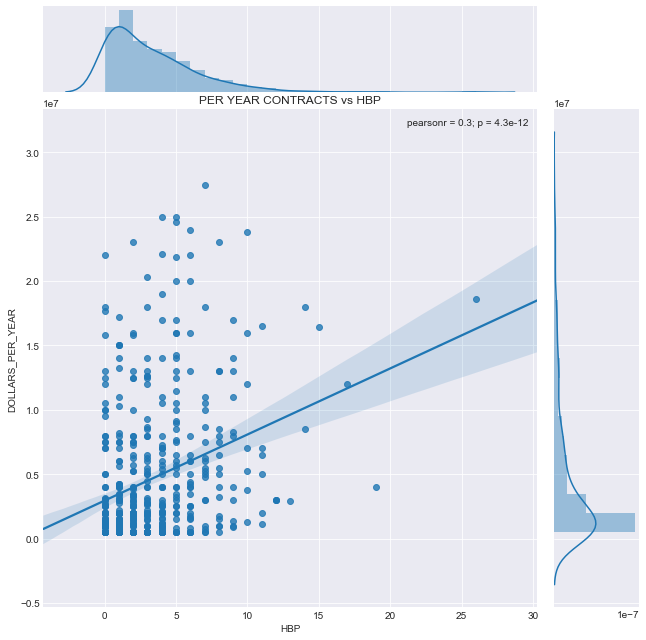

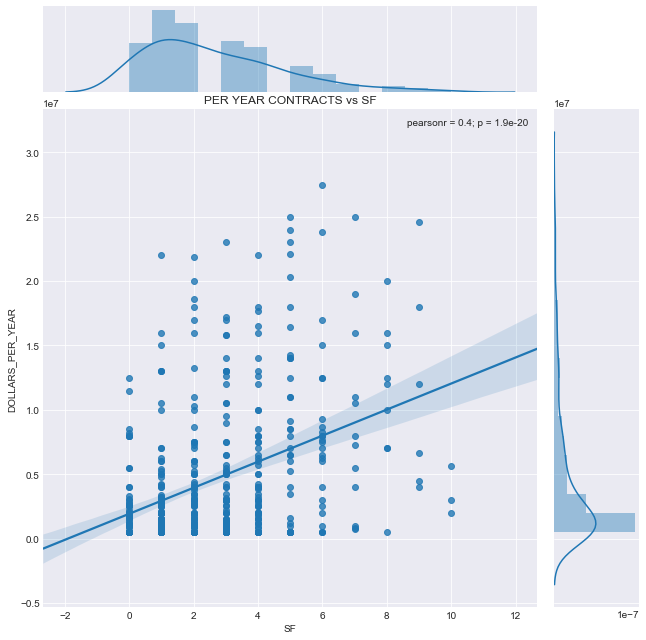

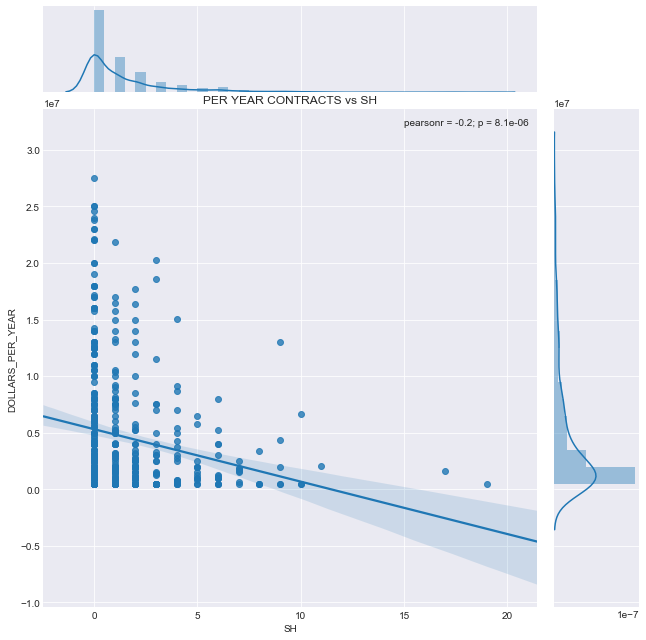

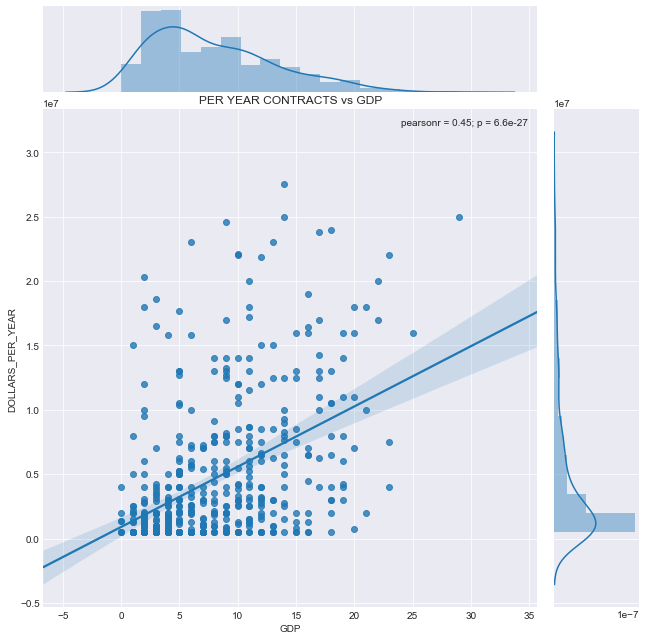

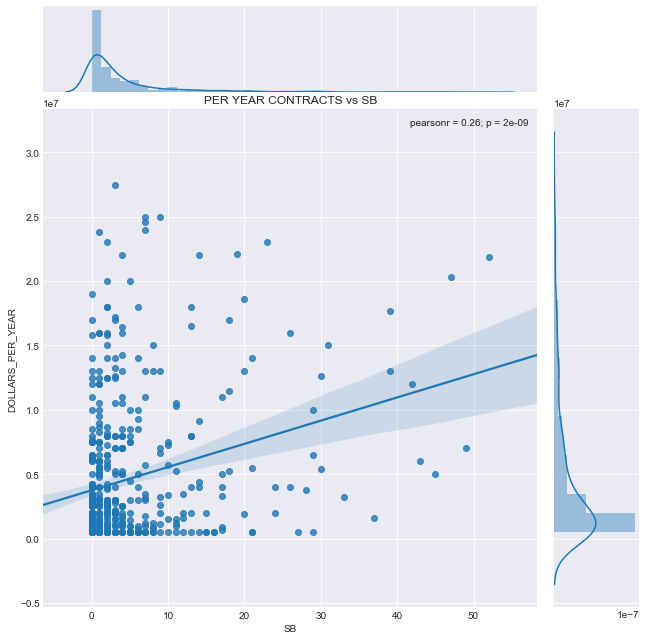

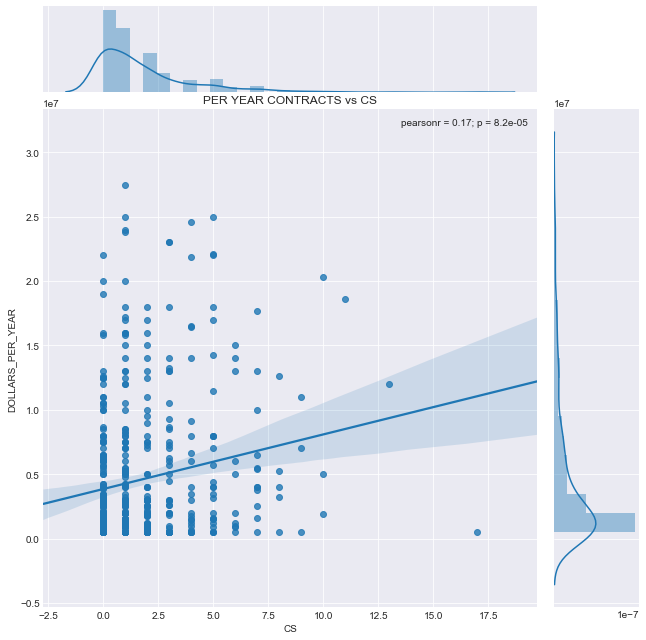

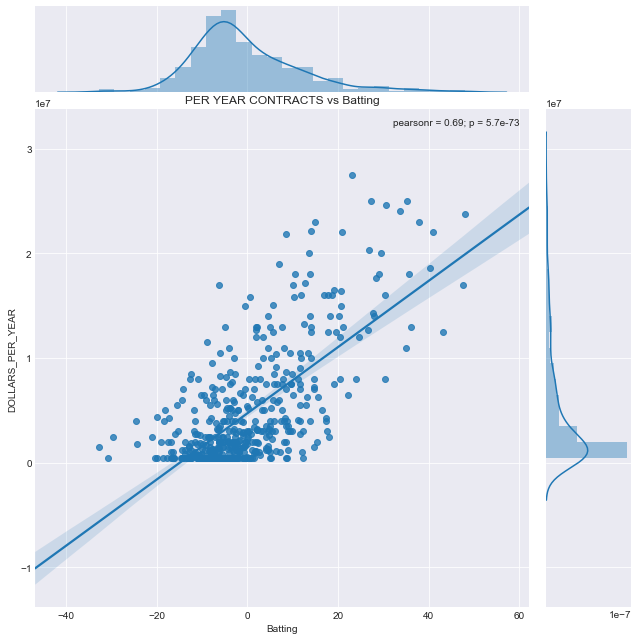

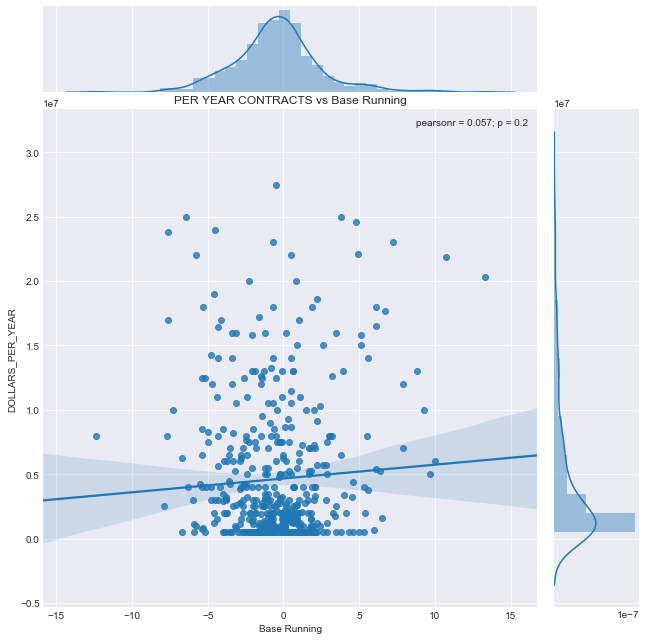

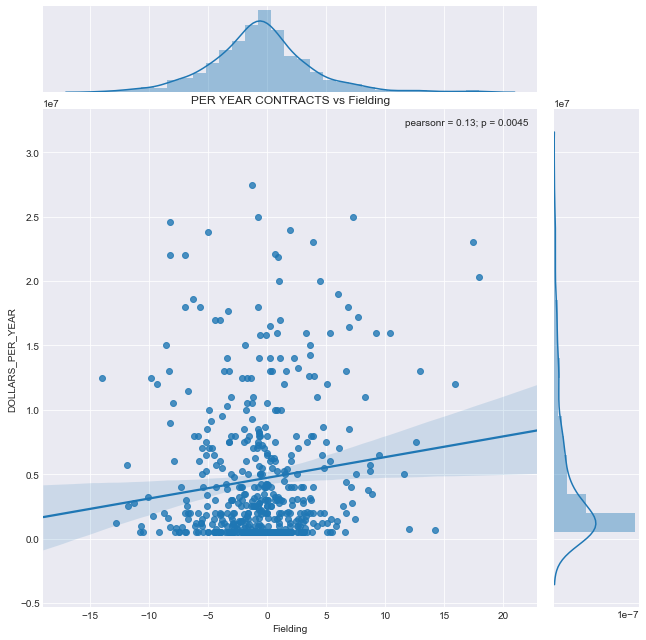

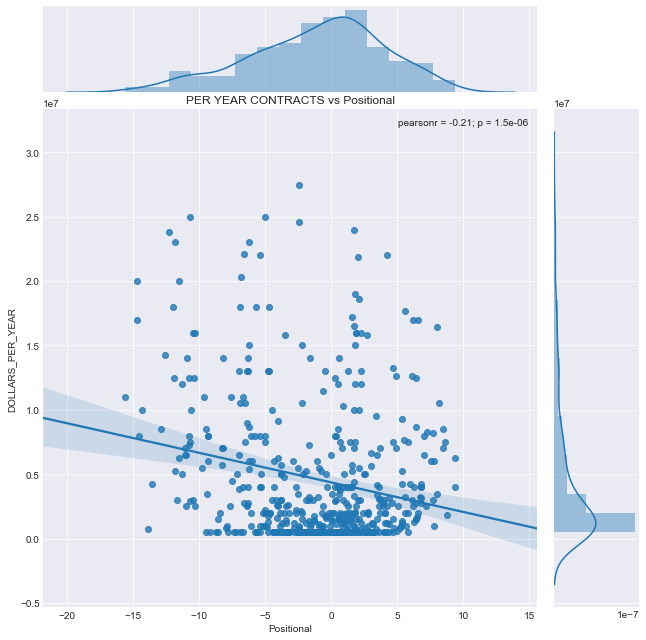

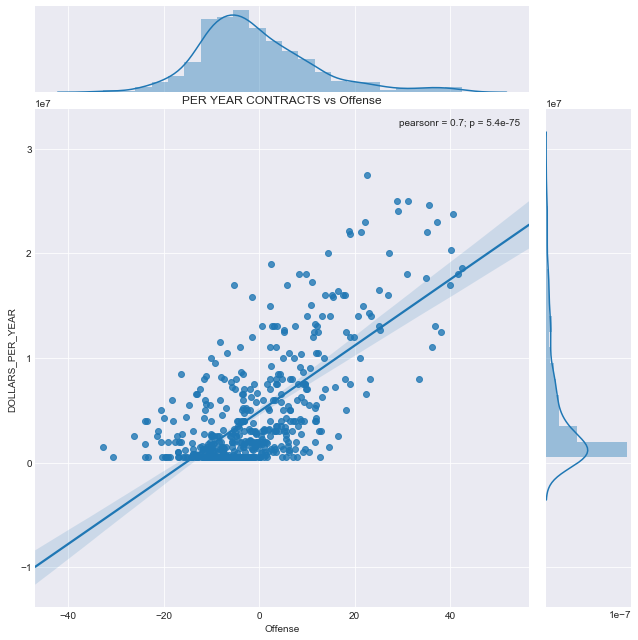

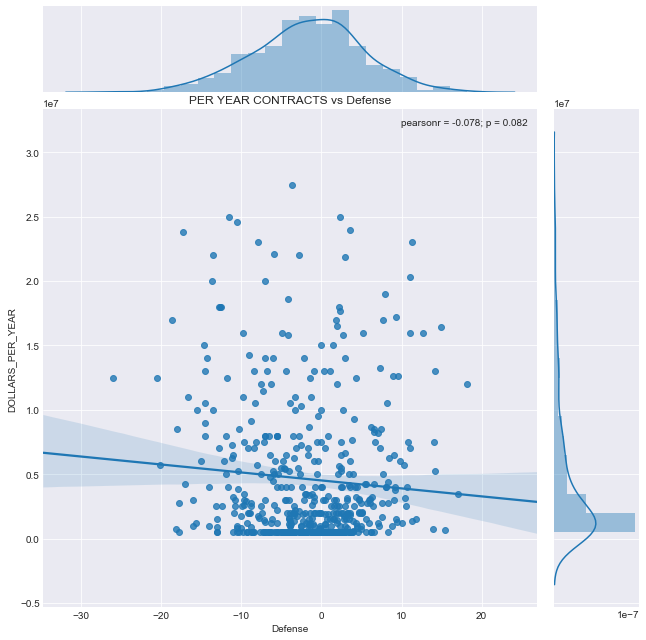

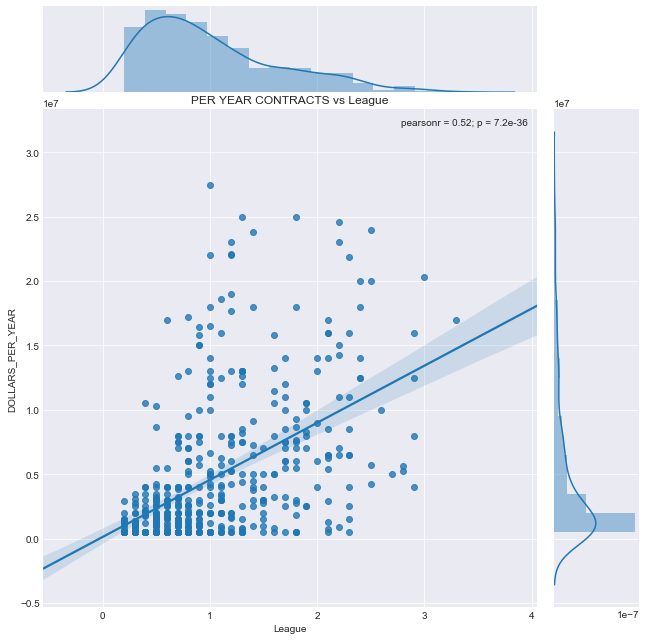

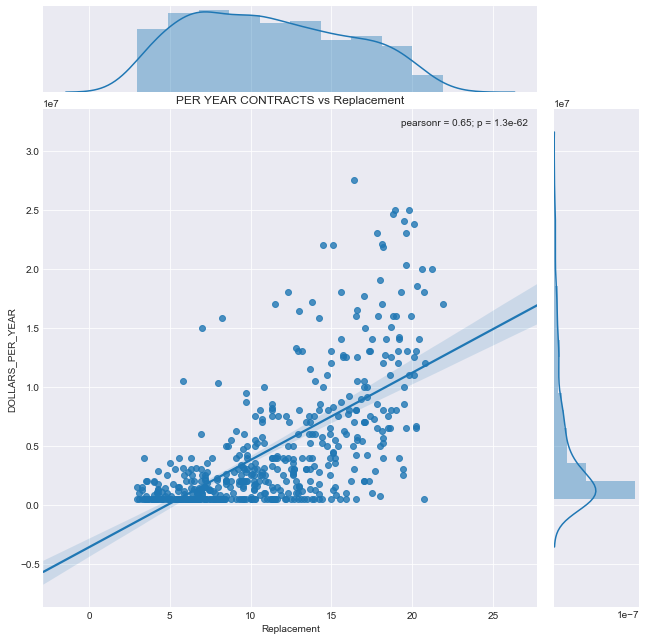

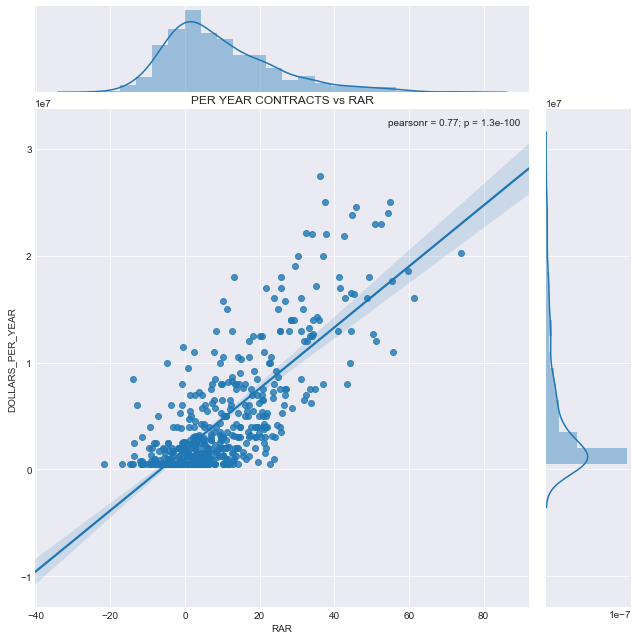

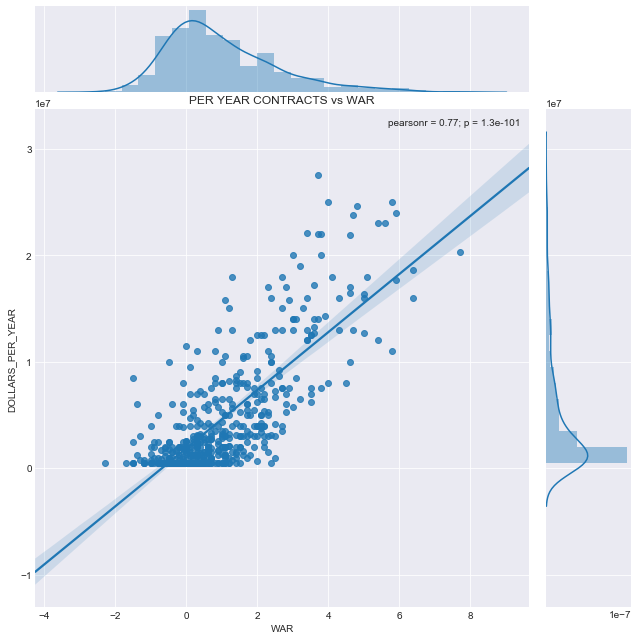

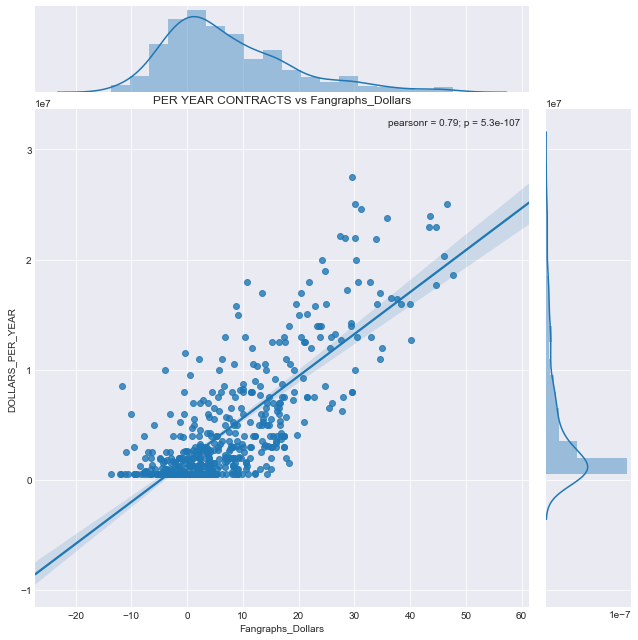

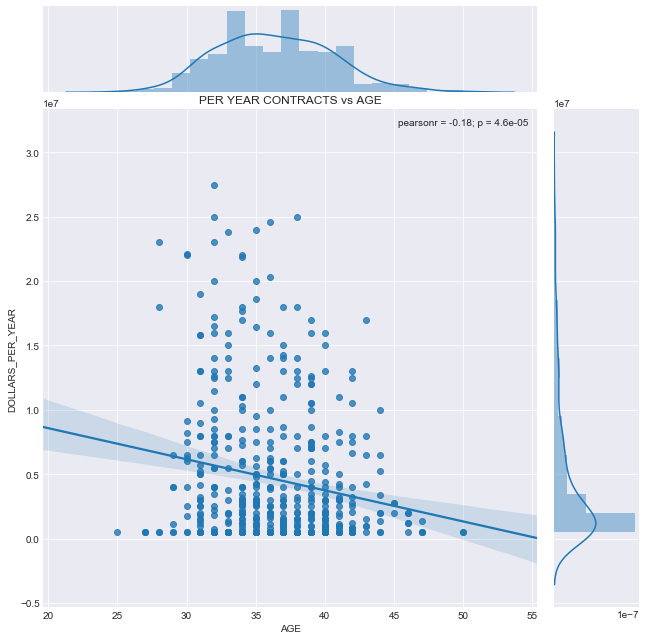

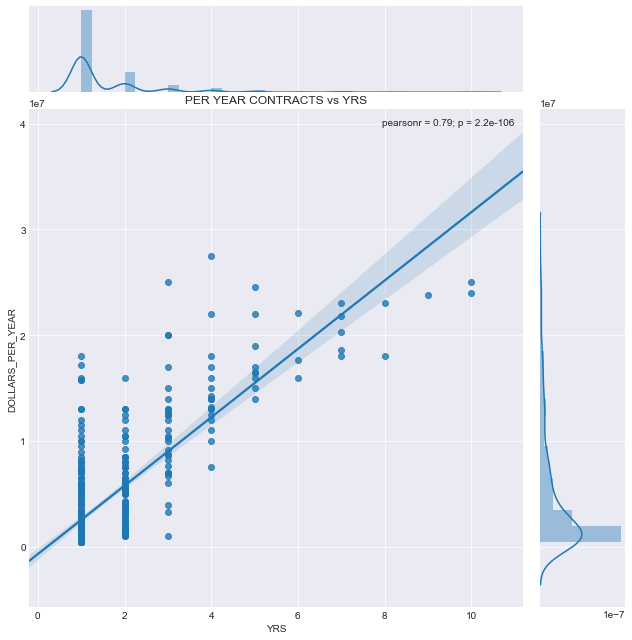

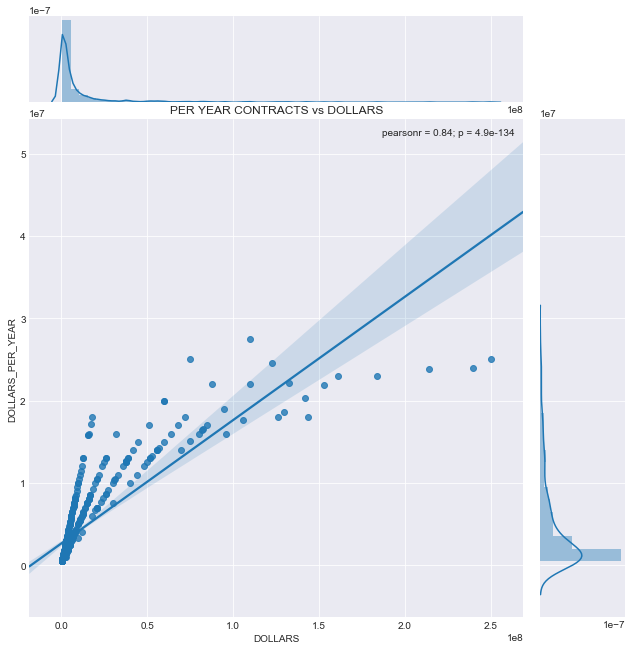

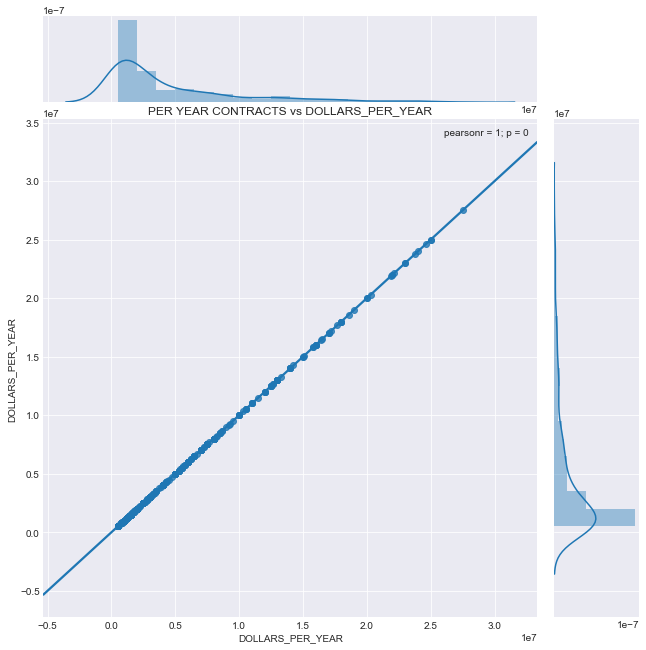

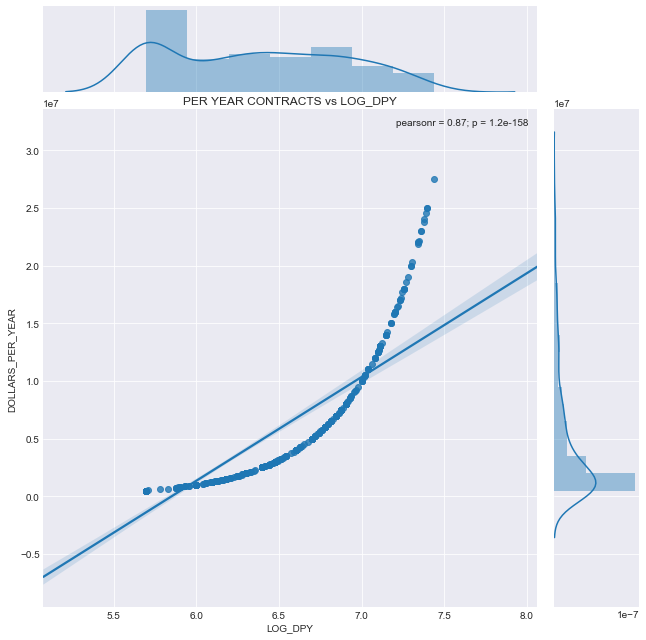

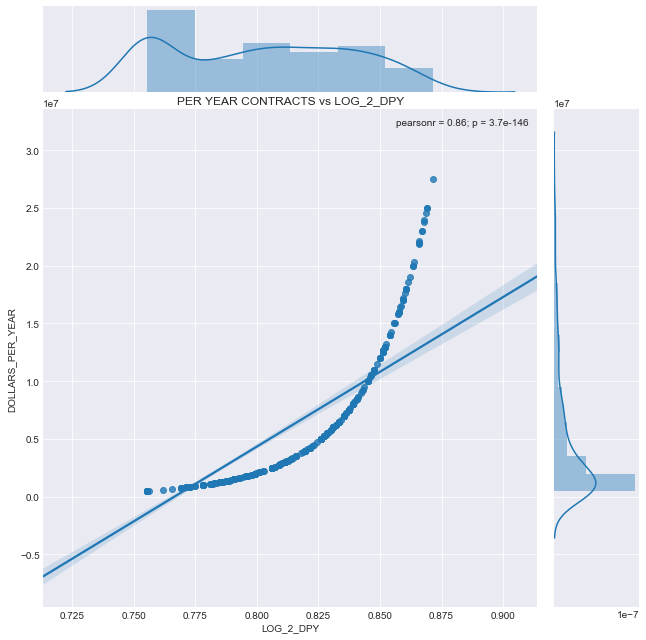

In [13]:
for col in num_cols:
#     fig,ax1 = plt.subplots(1, 1, figsize = (10, 10))

    sns.jointplot(x=col,y="DOLLARS_PER_YEAR",\
                  size=9,data=master_df,kind='reg')#,ax=ax1)
#     ax1.set_title(f"PER YEAR CONTRACTS vs {col}")
#     ax1.set_ylabel('DOLLARS_PER_YEAR')    
#     ax1.set_xlabel(f"{col}")
    
    plt.title(f"PER YEAR CONTRACTS vs {col}")
    plt.ylabel('DOLLARS_PER_YEAR')    
    plt.xlabel(f"{col}")
#     plt.show()

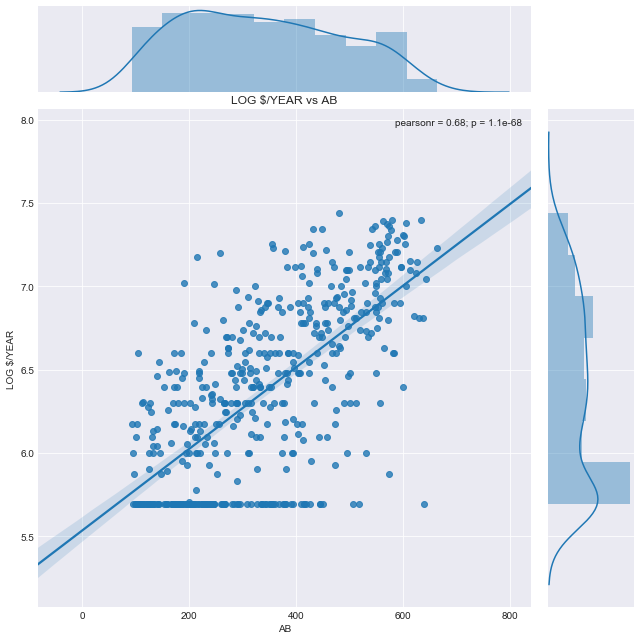

In [14]:
sns.jointplot(x="AB",y="LOG_DPY",\
              size=9,data=master_df,kind='reg')

plt.title("LOG $/YEAR vs AB")
plt.ylabel('LOG $/YEAR')    
plt.xlabel("AB")
plt.savefig("log_dollars_AtBats")

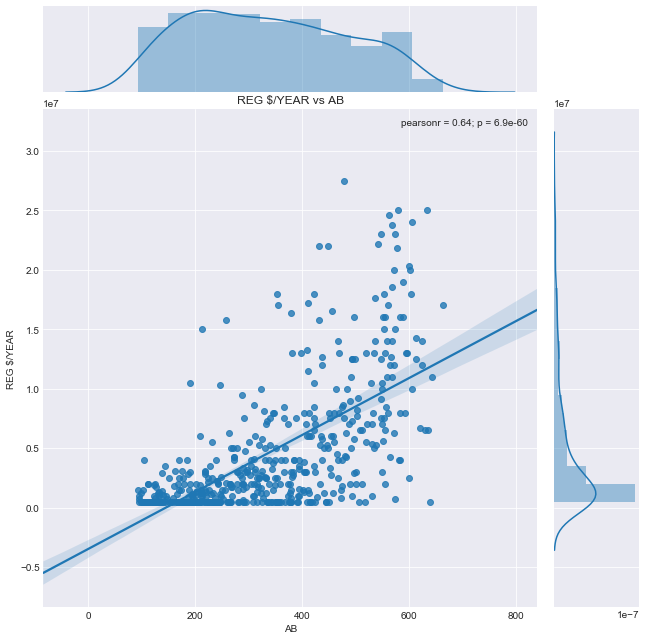

In [15]:
sns.jointplot(x="AB",y="DOLLARS_PER_YEAR",\
              size=9,data=master_df,kind='reg')

plt.title("REG $/YEAR vs AB")
plt.ylabel('REG $/YEAR')    
plt.xlabel("AB")
plt.savefig("reg_dollars_AtBats")

In [16]:
master_df["CONTRACT_YEAR"] = master_df["PLAYER_YEAR"].str[-4:]
master_df.sample()

PA_x   BB%    K%  BB/K  AVG_x    OBP    SLG    OPS    ISO  \
PLAYER_YEAR                                                                  
Luke Scott 2011   236  10.2  22.9  0.44   0.22  0.301  0.402  0.703  0.182   

                 Spd      ...        OLD_TEAM  NEW_TEAM  YRS  RK    DOLLARS  \
PLAYER_YEAR               ...                                                 
Luke Scott 2011  1.9      ...         Orioles      Rays  1.0  NR  6000000.0   

                     PLAYER_YEAR  DOLLARS_PER_YEAR   LOG_DPY  LOG_2_DPY  \
PLAYER_YEAR                                                               
Luke Scott 2011  Luke Scott 2011         6000000.0  6.778151   0.831111   

                 CONTRACT_YEAR  
PLAYER_YEAR                     
Luke Scott 2011           2011  

[1 rows x 62 columns]

In [17]:
yearly_money = master_df.groupby("CONTRACT_YEAR")["DOLLARS"].sum()
yearly_money = yearly_money.reset_index()
yearly_money

CONTRACT_YEAR       DOLLARS
0          2010  8.271870e+08
1          2011  9.242740e+08
2          2012  6.665220e+08
3          2013  1.086978e+09
4          2014  7.416700e+08
5          2015  9.759685e+08
6          2016  8.117430e+08
7          2017  6.596660e+08

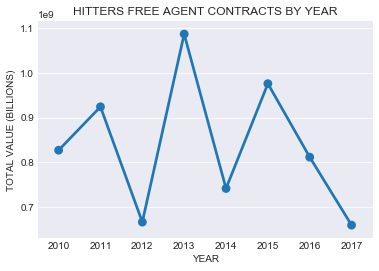

In [18]:
sns.pointplot(data=yearly_money,x="CONTRACT_YEAR",y="DOLLARS")
plt.title("HITTERS FREE AGENT CONTRACTS BY YEAR")
plt.xlabel("YEAR")
plt.ylabel("TOTAL VALUE (BILLIONS)")
plt.savefig("Free_Agents_Total_By_Year")

In [19]:
master_df.sample(5)

PA_x   BB%    K%  BB/K  AVG_x    OBP    SLG    OPS  \
PLAYER_YEAR                                                                   
J.P. Arencibia 2013       497   3.6  29.8  0.12  0.194  0.227  0.365  0.592   
A.J. Pierzynski 2013      529   2.1  14.4  0.14  0.272  0.297  0.425  0.722   
Franklin Gutierrez 2015   189   7.4  28.6  0.26  0.292  0.354  0.620  0.974   
Andres Blanco 2016        209   5.3  19.6  0.27  0.253  0.316  0.405  0.721   
Mike Napoli 2012          417  13.4  30.0  0.45  0.227  0.343  0.469  0.812   

                           ISO  Spd      ...         OLD_TEAM  NEW_TEAM  YRS  \
PLAYER_YEAR                              ...                                   
J.P. Arencibia 2013      0.171  1.7      ...        Blue Jays   Rangers  1.0   
A.J. Pierzynski 2013     0.153  2.1      ...          Rangers   Red Sox  1.0   
Franklin Gutierrez 2015  0.327  1.0      ...         Mariners  Mariners  1.0   
Andres Blanco 2016       0.153  4.2      ...         Phillies  Phillies  1.0   
Mike Napoli 2012         0.241  3.2      ...          Rangers   Red Sox  1.0   

                         RK    DOLLARS              PLAYER_YEAR  \
PLAYER_YEAR                                                       
J.P. Arencibia 2013      NR  1800000.0      J.P. Arencibia 2013   
A.J. Pierzynski 2013     NR  8250000.0     A.J. Pierzynski 2013   
Franklin Gutierrez 2015  NR  1500000.0  Franklin Gutierrez 2015   
Andres Blanco 2016       NR  3000000.0       Andres Blanco 2016   
Mike Napoli 2012         13  5000000.0         Mike Napoli 2012   

                         DOLLARS_PER_YEAR   LOG_DPY  LOG_2_DPY  CONTRACT_YEAR  
PLAYER_YEAR                                                                    
J.P. Arencibia 2013             1800000.0  6.255273   0.796246           2013  
A.J. Pierzynski 2013            8250000.0  6.916454   0.839883           2013  
Franklin Gutierrez 2015         1500000.0  6.176091   0.790714           2015  
Andres Blanco 2016              3000000.0  6.477121   0.811382           2016  
Mike Napoli 2012                5000000.0  6.698970   0.826008           2012  

[5 rows x 62 columns]

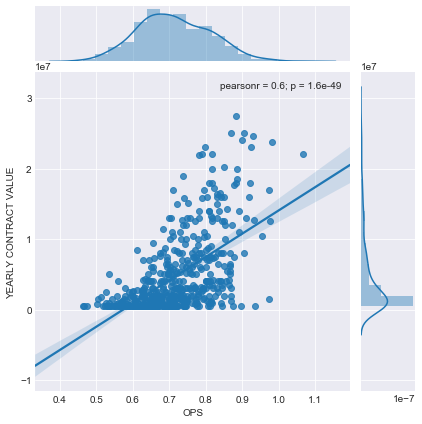

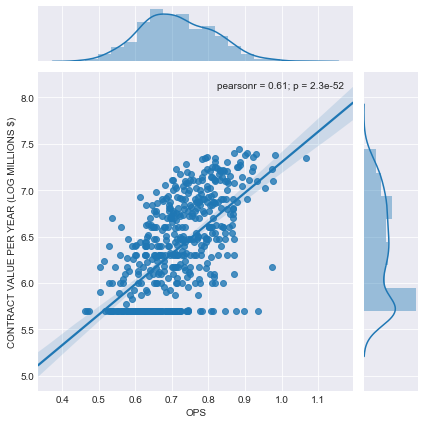

In [20]:
sns.jointplot(data=master_df,x="OPS",y="DOLLARS_PER_YEAR",kind='reg')
plt.xlabel("OPS")
plt.ylabel("YEARLY CONTRACT VALUE")
# plt.title("LOG^2")

sns.jointplot(data=master_df,x="OPS",y="LOG_DPY",kind='reg')
# plt.title("BATTING % VS FREE AGENT PER YEAR VALUE")
plt.xlabel("OPS")
plt.ylabel("CONTRACT VALUE PER YEAR (LOG MILLIONS $)");
plt.savefig("OPS_reg_log")

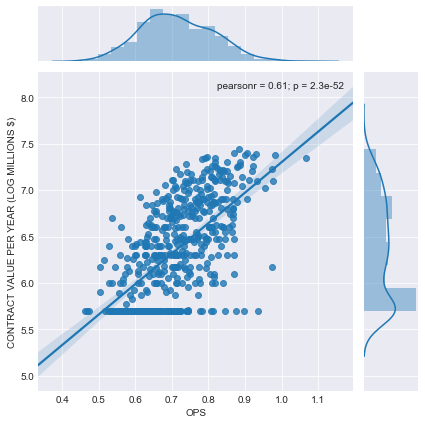

In [21]:
sns.jointplot(data=master_df,x="OPS",y="LOG_DPY",kind='reg')
# plt.title("BATTING % VS FREE AGENT PER YEAR VALUE")
plt.xlabel("OPS")
plt.ylabel("CONTRACT VALUE PER YEAR (LOG MILLIONS $)");

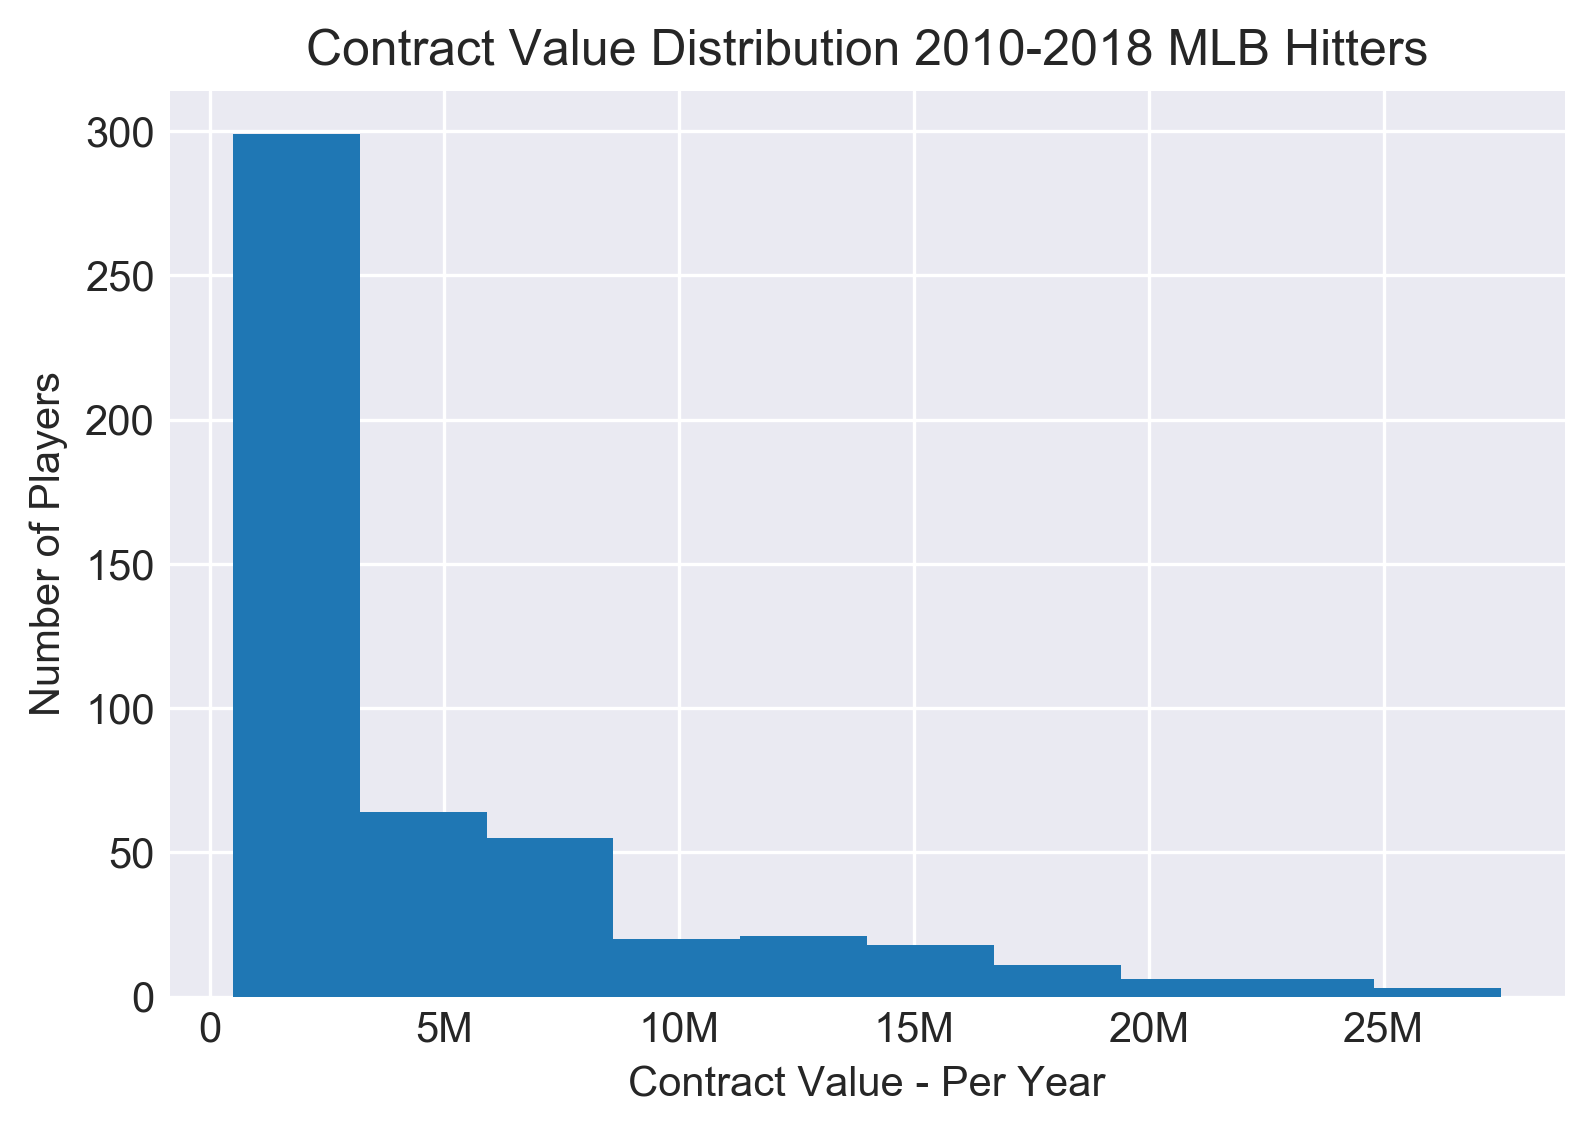

In [22]:
plt.rcParams['figure.dpi'] = 300
plt.hist(master_df["DOLLARS_PER_YEAR"])
plt.xlabel("Contract Value - Per Year")
plt.xticks(range(int(0e7),int(3e7),int(0.5e7)),["0","5M","10M","15M","20M","25M","30M"])
plt.ylabel("Number of Players")
plt.title("Contract Value Distribution 2010-2018 MLB Hitters");
plt.savefig("hist_contractvalue_players")

In [23]:
full_MLB_df = pickle.load( open( "df_MLB_Full.pkl", "rb" ) )
# power_hitting = master_df.groupby("CONTRACT_YEAR")
full_MLB_df["PLAYER_YEAR"].sample()

2846    Ryan Goins 2017
Name: PLAYER_YEAR, dtype: object

In [24]:
def contract_year(row):
    year = row["PLAYER_YEAR"][-4:]
    return year

full_MLB_df["CONTRACT_YEAR"] = full_MLB_df.apply(contract_year,axis=1)



In [25]:

homers = full_MLB_df.groupby("CONTRACT_YEAR")["HR"].sum()
slug = full_MLB_df.groupby("CONTRACT_YEAR")["SLG"].mean()

In [26]:
homers = homers.reset_index()
slug = slug.reset_index()
homers
slug

CONTRACT_YEAR       SLG
0          2010  0.397950
1          2011  0.392553
2          2012  0.396813
3          2013  0.391384
4          2014  0.381135
5          2015  0.401982
6          2016  0.411311
7          2017  0.422028

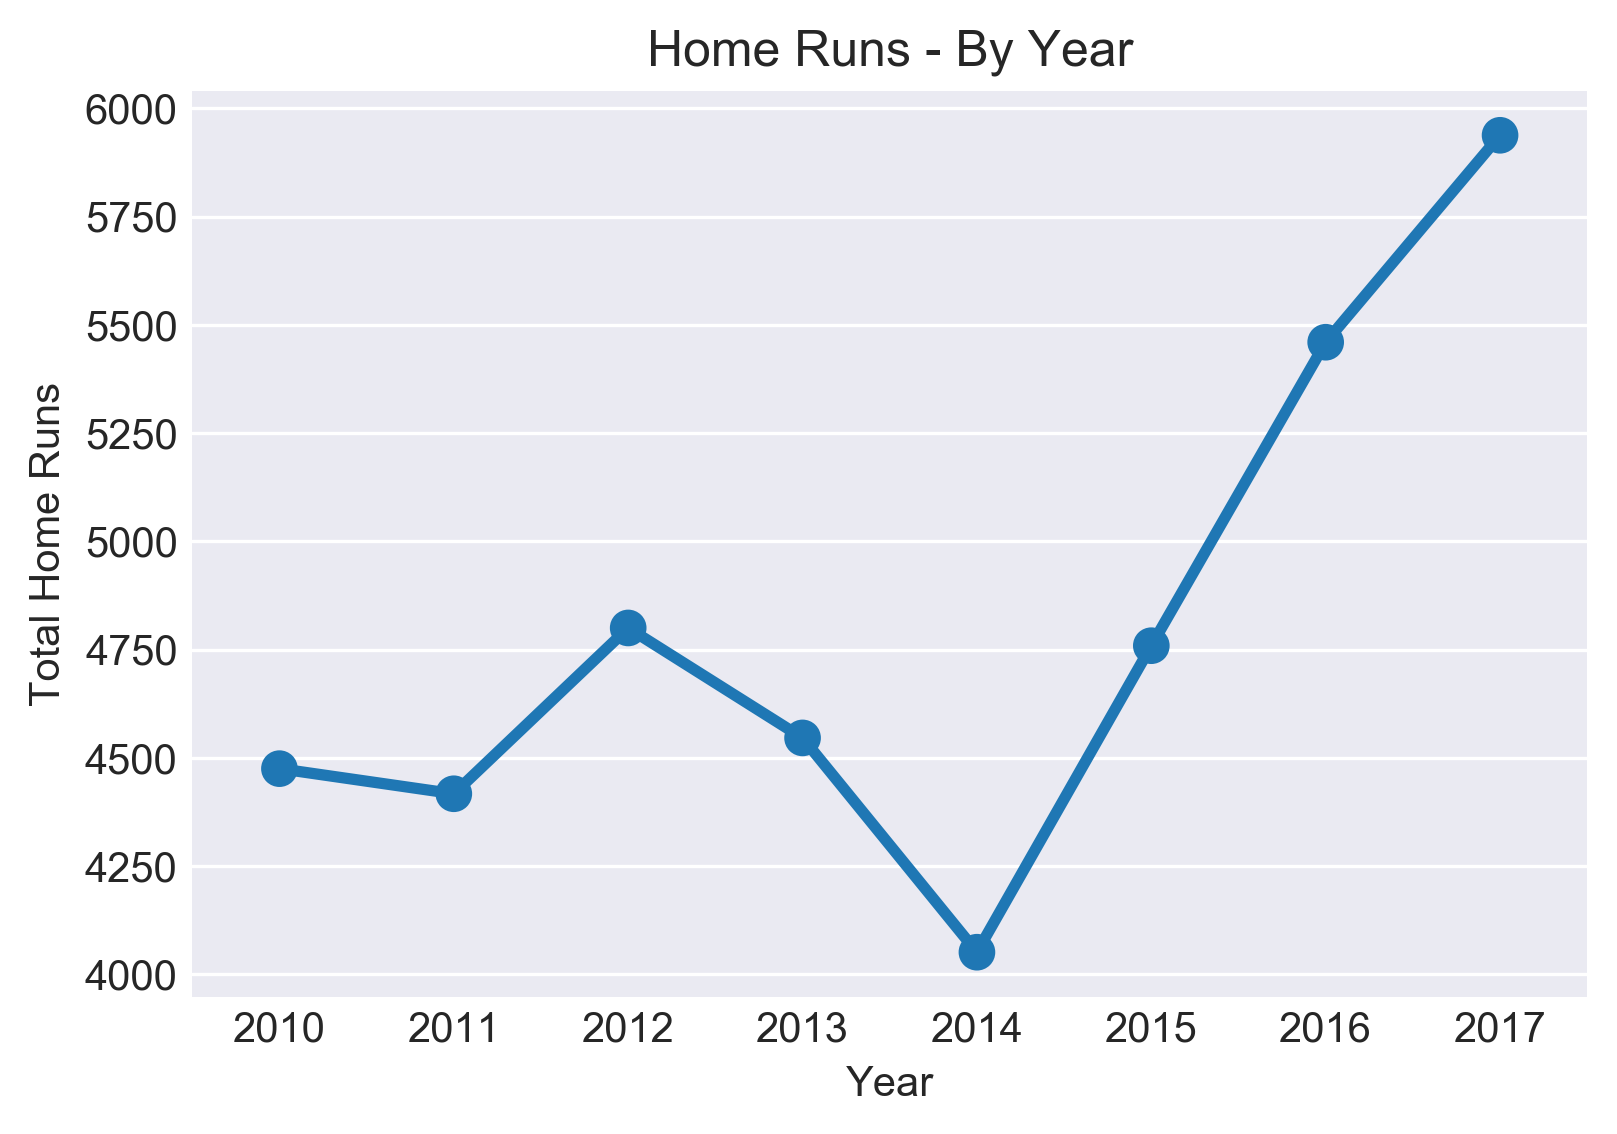

In [27]:
sns.pointplot(data=homers,x="CONTRACT_YEAR",y="HR")
# sns.set_style("darkgrid")
plt.style.use(u'seaborn-deep')
plt.title("Home Runs - By Year")
plt.xlabel("Year")
plt.ylabel("Total Home Runs")
plt.savefig("HRs_Total_By_Year")

In [28]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


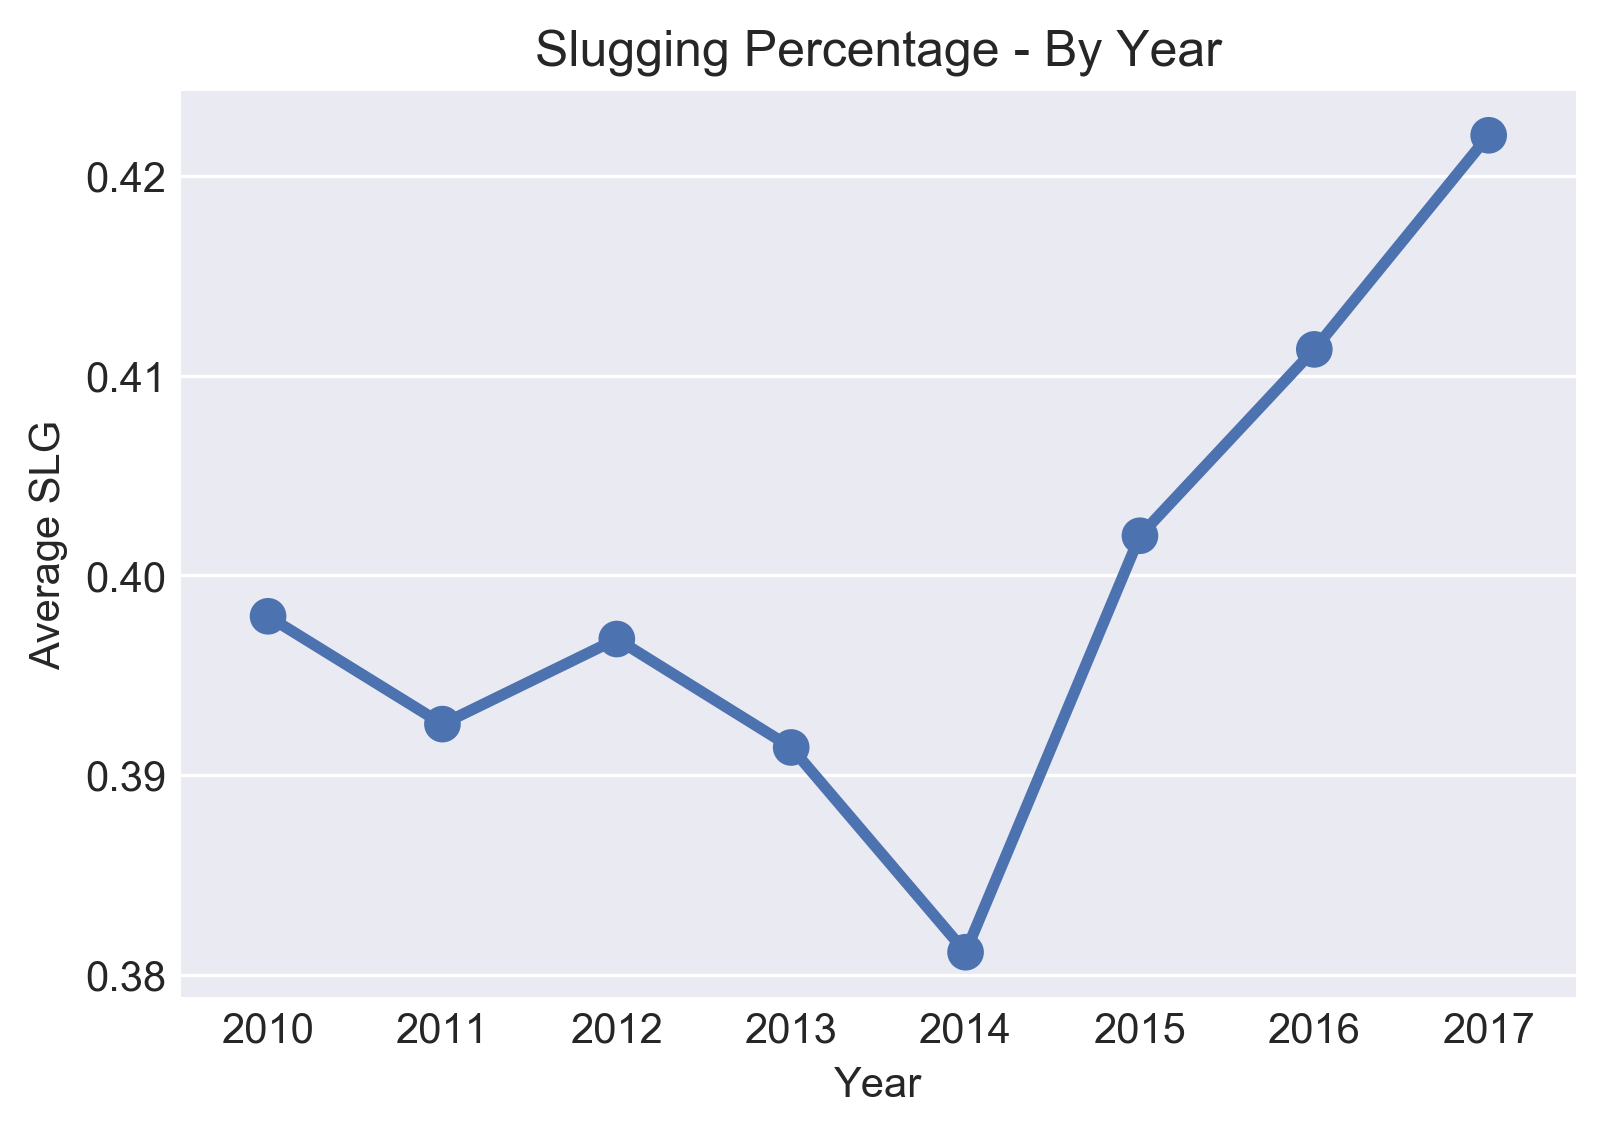

In [29]:
sns.pointplot(data=slug,x="CONTRACT_YEAR",y="SLG")
plt.style.use(u'seaborn-deep')
plt.title("Slugging Percentage - By Year")
plt.xlabel("Year")
plt.ylabel("Average SLG")
plt.savefig("SLG_Total_By_Year")

In [30]:
aver = full_MLB_df.groupby("CONTRACT_YEAR")["AVG_x"].mean()
aver = aver.reset_index()

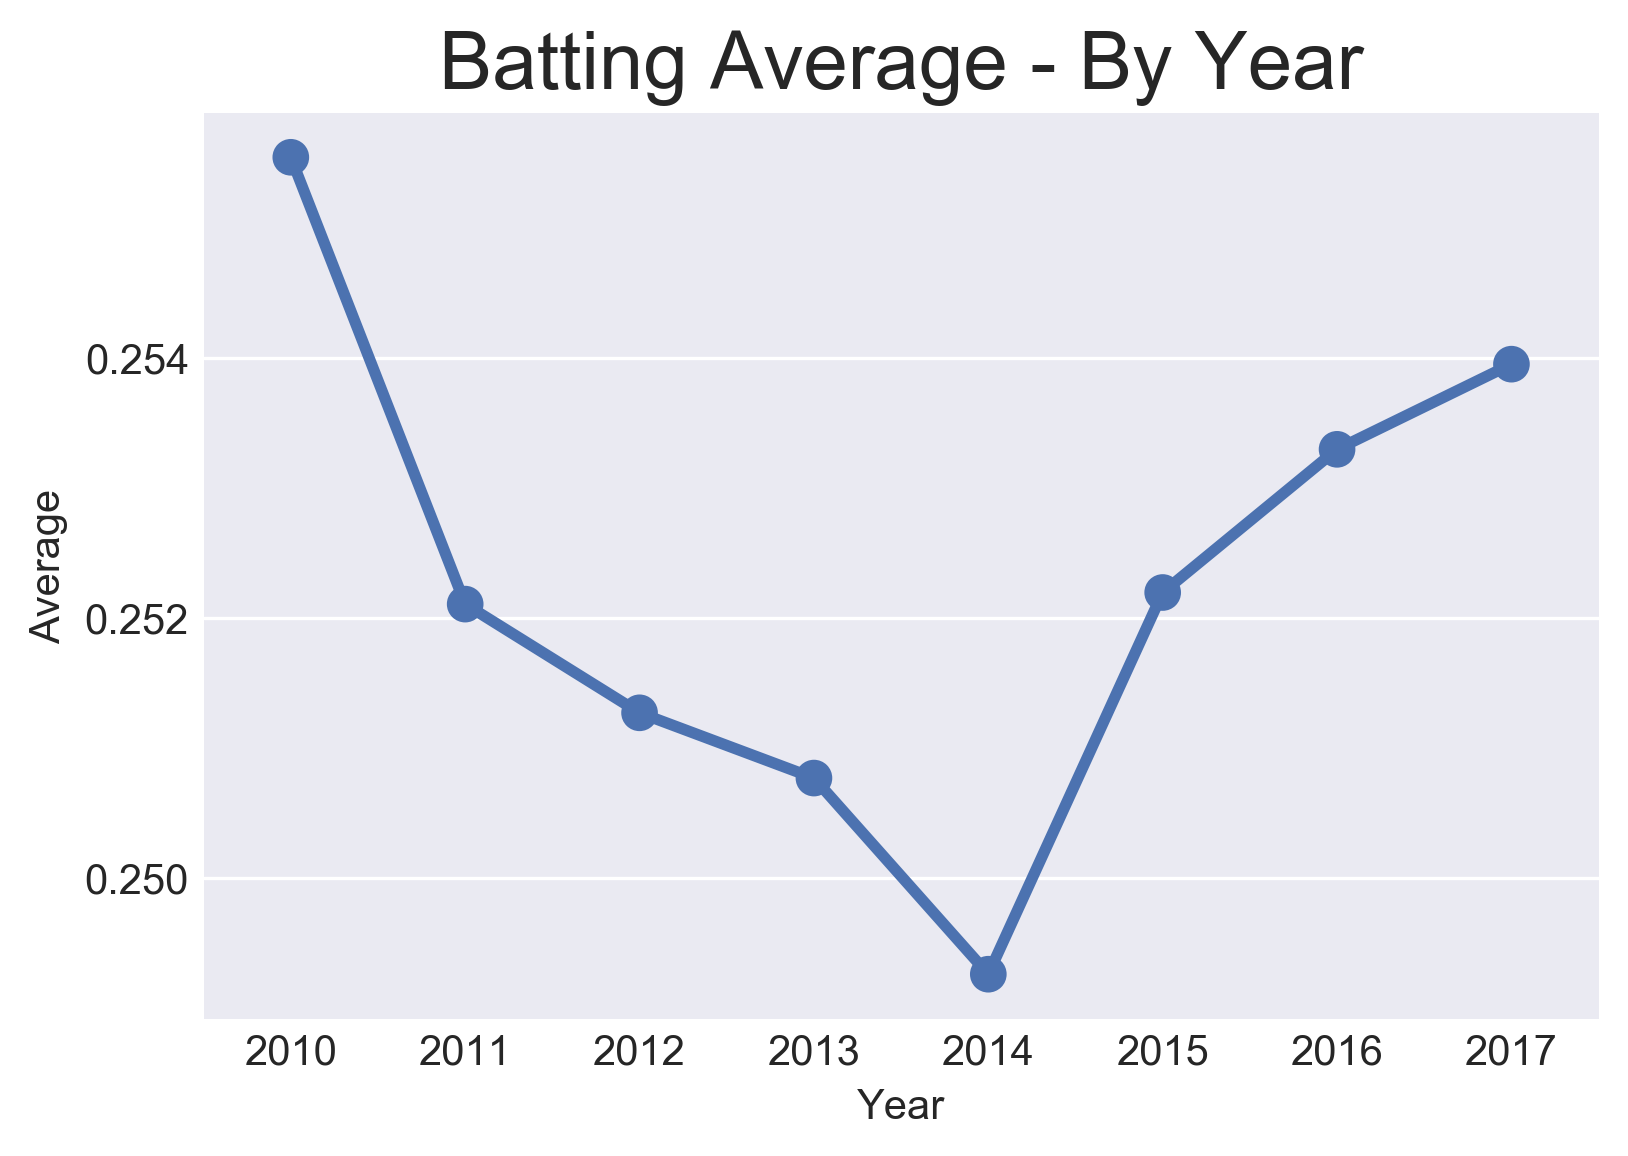

In [31]:
sns.pointplot(data=aver,x="CONTRACT_YEAR",y="AVG_x")
# sns.set_style(style='darkgrid')
plt.style.use(u'seaborn-deep')
sns.set_context("poster")
# plt.style.use(u'ggplot')
plt.title("Batting Average - By Year")
plt.xlabel("Year")
plt.ylabel("Average")
plt.savefig("AVG_Total_By_Year")